>__ACK:__ *** This whole code is developed by __Shama Satter__ ***

# __Create environment for running AI program__

> __Install libraris__ https://pypi.org

In [ ]:
# %pip install --upgrade pip
# %pip install --user --upgrade pandas
# %pip install --user --upgrade heartpy
# %pip install --user --upgrade tsfel
# %pip install --user --upgrade librosa
# %pip install --user --upgrade statsmodels
# %pip install --user --upgrade lightgbm
# %pip install --user --upgrade catboost
# %pip install --user --upgrade xgboost

> __Import libraries and dependencies__

In [ ]:
import pandas as pd
import numpy as np
import heartpy as hp
from   matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from   sklearn.ensemble import RandomForestRegressor
#import librosa
import csv
import pandas as pd
import os
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   sklearn.model_selection import GridSearchCV
import time
from   datetime import datetime
from   sklearn.metrics import mean_squared_error, accuracy_score
from   sklearn.metrics import r2_score
from   IPython.display import clear_output
from sklearn.model_selection import KFold

# __Data collection & preprocessing__

> Mount Gdrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

> Inserting Data

In [ ]:
## PPG Data
# define parent directory of PPG files
# PPG_dataDirectory = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
PPG_dataDirectory = './DataBase/Selected_PPG_wrist/'
# PPG CSV filenames
PPG_data =  [   
            '210823_4.csv',   
            '210830_0.csv',   
            '210927_0.csv',             
            '210927_1.csv',             
            '210927_2.csv',            
            '210928_0.csv',                       
            '210928_1.csv',          
            '210929_0.csv',           
            '210930_0.csv',            
            '210930_1.csv',            
            '210930_2.csv',           
            '210930_3.csv',            
            '210930_4.csv',           
            '210930_5.csv',         
            '211001_0.csv',         
            '211001_1.csv', 
            '211001_2.csv',
            '211018_1.csv',
            '211018_2.csv',
            '211018_3.csv',
            '211018_4.csv',
            '211019_0.csv',
            '211026_0.csv',
            '211026_1.csv',
            '211026_2.csv',
            '211026_3.csv',
            '211115_0.csv',
            '211115_1.csv',         
            ]
# Assigning complete filename of PPG CSV data
PPG_csvData = []
for fileName in PPG_data:
    PPG_csvData.append(PPG_dataDirectory+fileName)


## HbA1c data
HbA1c_data  =   [ 
                8.4,5.4,7.6,5.5,5.4,6.0,5.3,6.3,5.7,4.9,5.6,5.5,5.2,5.2,5.5,5.8,5.7,5.6,5.5,5.7,5.6,7.4,6.2,7.0,6.3,5.3,8.2,6.7
                ]


## SpO2 data
SpO2_data   =   [ 96,97,97,98,97,96,97,97,96,96,97,95,95,98,97,95,97,97,97,97,97,96,97,96,97,98,97,97                
                ]


## Age data
Age_data    =   [ 
                34,25,63,26,25,63,30,27,25,34,
                35
                ]


## Gender data
Gender_data =   [ 
                'M','F','M','M','F','M','F','M','M','M',
                'M','M','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'
                ]


                
## BMI data
BMI_data    =   [ 
                28.71,23.6,28.71,24,23.6,23.3,27.9,25.8,25.82,19.71,22.72,33.96,20.64,22.04,25.26,20.6,20.4,33.3,26.4,22.2,30.1,28.71,19.6,25.8,29.1,32.8,30.4,21.7
                ]


print('*****************PPG_csvData******************')
print(PPG_csvData)
print('Data counted = '+ str(len(PPG_csvData)))
print('******************HbA1c_data******************')
print(HbA1c_data)
print('Data counted = '+ str(len(HbA1c_data)))
print('******************SpO2_data*******************')
print(SpO2_data)
print('Data counted = '+ str(len(SpO2_data)))
print('*******************Age_data*******************')
print(Age_data)
print('Data counted = '+ str(len(Age_data)))
print('*****************Gender_data******************')
print(Gender_data)
print('Data counted = '+ str(len(Gender_data)))


print('******************BMI_data********************')
print(BMI_data)
print('Data counted = '+ str(len(BMI_data)))

> Making array

In [ ]:
PPG_csvArray  = np.asarray(PPG_csvData)
HbA1c_Array   = np.asarray(HbA1c_data)
SpO2_Array    = np.asarray(SpO2_data)
Age_Array     = np.asarray(Age_data)
Gender_Array  = np.asarray(Gender_data)
BMI_Array     = np.asarray(BMI_data)

# __User Defined Functions and Algorithms__

> __Function 00:__ Visualize PPG signal

In [ ]:
def visual_PPG(PPG, drawFigure=True):

    for i in range (0,len(PPG)):
        
        # Getting corresponding Combined PPG Data 
        dat    = pd.read_csv(PPG[i], delimiter=',', header=None)
        print('********************************')
        print('Index='+str(i)+' || '+str(PPG[i]))
        print('********************************')
        if (dat.shape[1] == 3):
           bs = dat.iloc[:,2]
           gs = dat.iloc[:,1]
           rs = dat.iloc[:,0]
        else:
           bs = dat.iloc[:,3]
           gs = dat.iloc[:,2]
           rs = dat.iloc[:,1]
    
        # Visualization **Don't mention inside the pseudo code**
        if drawFigure:
           plt.rcParams.update(plt.rcParamsDefault)
           plt.rcParams['font.size'] = '8'
           fig,axs = plt.subplots(3, figsize=(20, 5))
           axs[0].set(title='Visualization of Wrist PPG Signal')
           axs[0].plot(bs, color='blue', label='blue signal')
           axs[0].set(ylabel = ' ')
           axs[0].legend(loc=1)
           axs[0].grid(True)
           axs[1].plot(gs, color='green', label='green signal')
           axs[1].set(ylabel = ' ', xlabel = ' ')
           axs[1].legend(loc=1)
           axs[1].grid(True)
           axs[2].plot(rs, color='red', label='red signal')
           axs[2].set(ylabel = ' ', xlabel = ' ')
           axs[2].legend(loc=1)
           axs[2].grid(True)
           plt.show()
        
    # Return
    return

> __Function 01:__ BA_Plot

In [ ]:
def bland_altman_plot(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff,   c = 'black')
    plt.axhline(md,           color='green', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red',   linestyle='--')
    plt.axhline(md - 1.96*sd, color='red',   linestyle='--')
    plt.xlabel("Average of the two measures", fontsize = 14)
    plt.ylabel("Difference between the two measures", fontsize = 14)
    plt.title("Bland-Altman plot for estimated %HbA1c values", fontsize = 14)
    # plt.savefig('./Figure/RF_trans_BA_Plot.png', bbox_inches = "tight", transparent = True, dpi = 400)

> __Function 02:__ EGA_Plot

In [ ]:
from matplotlib.patches import Circle, Wedge, Polygon, Path
from matplotlib.collections import PatchCollection

def error_grid_analysis(ref,est):
    fig, ax = plt.subplots()

    polygons = []

    A  = [[4.0,4.0],[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,12.0],[6.5,12.0],[6.5,7.2],[5.4,5.7],[4.0,5.7]]
    Bd = [[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,5.7],[6.5,5.7],[6.5,4.0]]
    Bu = [[4.0,5.7],[5.4,5.7],[6.5,7.2],[6.5,12.0],[5.7,12.0],[5.7,6.5],[4.0,6.5]]
    Cd = [[6.5,4.0],[6.5,5.7],[12.0,5.7],[12.0,4.0]]
    Cu = [[4.0,6.5],[5.7,6.5],[5.7,12.0],[4.0,12.0]]

    # print(np.asarray(A).shape)
    pA  = Polygon(np.asarray(A))
    pBd = Polygon(np.asarray(Bd))
    pBu = Polygon(np.asarray(Bu))
    pCd = Polygon(np.asarray(Cd))
    pCu = Polygon(np.asarray(Cu))

    polygons.append(pA)
    polygons.append(pBd)
    polygons.append(pBu)
    polygons.append(pCd)
    polygons.append(pCu)


    p = PatchCollection(polygons)
    p.set_color([[0,1,0,0.3],[1,1,0,0.3],[1,1,0,0.3],[1,0,0,0.3],[1,0,0,0.3]])
    ax.add_collection(p)



    plt.plot([4.0,12.0],[4.0,12.0])


    x = ref
    y = est

    sA = []
    sB = []
    sC = []
    for i in range(len(y)):
        sA.append(int(pA.contains_point ([x[i],y[i]]))*30)
        sB.append(int(pBd.contains_point([x[i],y[i]]) or pBu.contains_point([x[i],y[i]]))*30)
        sC.append(int(pCd.contains_point([x[i],y[i]]) or pCu.contains_point([x[i],y[i]]))*30)


    plt.scatter(x,y,s=sA,color=[0.227, 0.513, 0.282,1])
    plt.scatter(x,y,s=sB,color=[0.886, 0.654, 0.133,1])
    plt.scatter(x,y,s=sC,color=[0.941, 0, 0.098,1])

    lx = np.linspace(min(x), max(x), 100)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(lx,p(lx))


    plt.text(10.5,9,'A',fontsize=26)
    plt.text(9,10.5,'A',fontsize=26)
    plt.text(10.5,5.94,'B',fontsize=26)
    plt.text(5.94,10.5,'B',fontsize=26)
    plt.text(10.5,4.7,'C',fontsize=26)
    plt.text(4.7,10.5,'C',fontsize=26)
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.xlim([4.0,12.0])
    plt.ylim([4.0,12.0])
    plt.xlabel('HbA1c Invasive device (%NGSP)',fontsize=15)
    plt.ylabel('HbA1c Estimated (%NGSP)',fontsize=15)
    plt.title('Error Grid Analysis (EGA) for estimated %HbA1c values',fontsize=15)
    plt.show()

> __Function 03:__ Evaluation
>> ACK: __Developed by Shama__. _To visualize performance and evaluate model_

In [ ]:
def evaluation_metrics_including_BA_and_EGA_plot(modelName, predictedValue, exactValue):
    print('############ HbA1c Evaluation Metrics of ' + modelName + ' Regression ############')
    CVy = np.asarray(predictedValue)
    CVx = np.asarray(exactValue)
    print('Diff STD  = ',np.std(CVx-CVy))
    print('MSE       = ',np.sum((CVx-CVy)**2)/CVy.shape[0])
    print('ME        = ',np.sum((CVx-CVy))/CVy.shape[0])
    print('MAD       = ',np.sum(np.abs(CVx-CVy))/CVy.shape[0])
    print('RMSE      = ',np.sqrt(np.sum((CVx-CVy)**2)/CVy.shape[0]))
    print('R2 score  = ',r2_score(CVx,CVy))
    print('Pearson R and p-value: ',scipy.stats.pearsonr(CVx,CVy))
    print('##################################################################################\n')
    bland_altman_plot  (predictedValue, exactValue)
    error_grid_analysis(predictedValue, exactValue)

> __Algorithm 01:__ Baseline Dirft Removal by ()
>> ACK: __Developed by Shama__. _This algorithm ()_
>> 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
>> 2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [ ]:
### Initialize Second Order Section
sos  = scipy.signal.butter(N=2, Wn=8.0, btype='low',  fs=32, output='sos')  ### The sampling frequency of the digital system(‘fs’).second-order sections (‘sos’)
sos1 = scipy.signal.butter(N=2, Wn=0.5, btype='high', fs=32, output='sos')  ###
def removing_baseline_drift (ppgSignal, showFigure='False'): 
   # Getting corresponding Combined PPG Data 
   dat   = pd.read_csv(ppgSignal, delimiter=',', header=None)
   if (dat.shape[1] == 3):
      bs = dat.iloc[:,2]
      gs = dat.iloc[:,1]
      rs = dat.iloc[:,0]
   else:
      bs = dat.iloc[:,3]
      gs = dat.iloc[:,2]
      rs = dat.iloc[:,1]
   fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]
   fil_s_g = scipy.signal.sosfilt(sos, gs)[10:]
   fil_s_r = scipy.signal.sosfilt(sos, rs)[10:]

   fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b)
   fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)
   fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
   
   ### Visualization
   if showFigure=='True':
      print('***************Blue**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_b), color='blue', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_b1), color='blue', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

      print('***************Green**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_g), color='green', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_g1), color='green', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()
      
      print('***************Red**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_r), color='red', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_r1), color='red', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

   ## Return outcome
   return(fil_s_r1, fil_s_g1, fil_s_b1)

>> Test Algorithm 01:

In [ ]:
# for i in range(len(PPG_csvArray)):
#     print(f'**********PPG_info:{PPG_csvArray[i]}**********')
#     r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='True')

> __Algorithm 02:__ splitSignal into discrete segments

In [ ]:
def splitSignal (individualSignal, horizonSize=50, windowSize=200):
    overallSignal  = []
    completeFlag   = 0
    for i in range (0, len(individualSignal), horizonSize):
        if i+windowSize < len(individualSignal): #Only consider sets with windowSize data
            splittedSignal = []
            for j in range(windowSize):
                splittedSignal.append(individualSignal[i+j])
            overallSignal.append(splittedSignal)
    x = np.array(overallSignal) 
    return (x)

>> Test algorithm 02

In [ ]:
horizonSet = 30
windowSet  = 180
countData  = 0
for i in range(len(PPG_csvArray)):
    r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='False')
    r_ = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
    print(r_.shape)
    countData += r_.shape[0]*r_.shape[1]
print(f'dCount={countData}')
### Plotting on the first one
pd.DataFrame(r_[0]).plot()
plt.show()

> __Algorithm 03:__ Butter BandPass Filter (Include this in SCI)
>> 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
>> 2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
>> 3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html#scipy.signal.sosfilt

In [ ]:
def butter_filter(xArray, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='low'):
    nyquistFreq  = 0.5 * samplingFreq
    criticalFreq = cutoffFreq/nyquistFreq
    # Butterworth digital and analog filter design.
    if filterType == 'band':
        sos = scipy.signal.butter(N=filterOrder, Wn=[0.1, criticalFreq], btype='bandpass', analog=False, output='sos')
    elif filterType == 'low':
        sos = scipy.signal.butter(N=filterOrder, Wn=criticalFreq,        btype='lowpass',  analog=False, output='sos')
    elif filterType == 'high':
        sos = scipy.signal.butter(N=filterOrder, Wn=criticalFreq,        btype='highpass', analog=False, output='sos')
    # Filter data along one-dimension with an IIR or FIR filter.
    y = scipy.signal.sosfilt(sos=sos, x=xArray)
    return y

>> Test Algorithm 03

In [ ]:
# print('Actual Splitted Signal')
# pd.DataFrame(r_[0]).plot()
# print('After applying mean function')
# data = r_[0]-np.mean(r_[0])
# pd.DataFrame(data).plot()
# print('After applying filter')
# filteredSignal_lp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='low')
# filteredSignal_bp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='band')
# filteredSignal_hp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='high')
# pd.DataFrame(filteredSignal_lp).plot()
# # pd.DataFrame(filteredSignal_bp).plot()
# # pd.DataFrame(filteredSignal_hp).plot()
# plt.show()

In [ ]:
# ac, dc= determine_ac_dc_from_PPG(filteredSignal_lp, showFigure='True')

> __Algorithm 04:__ Determine AC_DC_from_Signal __(I have replaced with a new algorithm)__
>> ACK: __Developed by Shama__. _This algorithm is developed to determine __r1__ and __r2__ which significantly improve the performance of the trained models_

In [ ]:
# def determine_ac_dc_from_PPG (Signal):
#     uPeak =  scipy.signal.find_peaks(Signal)
#     uPeak =  pd.DataFrame(uPeak[0])
#     lPeak =  scipy.signal.find_peaks(-Signal)
#     lPeak =  pd.DataFrame(lPeak[0])

#     if (len(uPeak)<len(lPeak)):
#         indexLength = len(uPeak)
#     else:
#         indexLength = len(lPeak)

#     for index in range(indexLength):
#         newValue_ac =  Signal[uPeak.iloc[index]] - Signal[lPeak.iloc[index]]
#         newValue_dc =  Signal[lPeak.iloc[index]]
#         if index ==0:
#             allValue_ac = newValue_ac
#             allValue_dc = newValue_dc
#         else:
#             allValue_ac =  np.append(allValue_ac,newValue_ac)
#             allValue_dc =  np.append(allValue_dc,newValue_dc)

#     meanValue_ac = np.mean(allValue_ac)
#     meanValue_dc = np.mean(allValue_dc)

#     return meanValue_ac,meanValue_dc

> __Algorithm 04:__ Determine AC_DC_from_PPG (new developed)
>> ACK: __Developed by Shama__. _This algorithm is developed to determine __r1__ and __r2__ which significantly improve the performance of the trained models_

In [ ]:
def determine_ac_dc_from_PPG (Signal, showFigure='False'):
    maxArray = []
    minArray = []
    p2pPanDF = pd.DataFrame({'index':[], 'value':[]})
    midValue = np.mean(Signal)
    maxValue = midValue
    minValue = midValue
    maxIndex = 0
    minIndex = 0

    for i in range(len(Signal)):
        nowValue = Signal[i]
        if (nowValue>midValue):
            if (minValue<midValue and minIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[minIndex], 'value':[minValue]})], ignore_index=True, sort=False)
                minArray = np.append(minArray, minValue)
                minValue = midValue
            if (nowValue>maxValue):
                maxValue = nowValue
                maxIndex = i
        if (nowValue<midValue):
            if (maxValue>midValue and maxIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[maxIndex], 'value':[maxValue]})], ignore_index=True, sort=False)
                maxArray = np.append(maxArray, maxValue)
                maxValue = midValue
            if (nowValue<minValue):
                minValue = nowValue
                minIndex = i

    ## Calculate AC and DC
    acSignal = np.mean(maxArray) - np.mean(minArray)
    dcSignal = np.mean(minArray)

    ## Show Figure
    if (showFigure=='True'):
        plt.rcParams.update(plt.rcParamsDefault)
        plt.rcParams['font.size'] = '9'
        plt.figure(figsize=(21, 3))
        plt.title(f'***Analyze AC and DC Characteristics in a PPG Signal*** \n AC={acSignal} and DC={dcSignal} \n Total Peaks={len(maxArray)}(mean={np.mean(maxArray)}) and Valley={len(minArray)}(mean={np.mean(minArray)})', y=1, loc='center')
        plt.xlabel('Sample Count')
        plt.ylabel(' ')
        for i in range(len(Signal)):
            plt.plot(i, midValue,          '.', color='green')
            plt.plot(i, np.mean(maxArray), '.', color='blue')
            plt.plot(i, np.mean(minArray), '.', color='cyan')
        plt.plot(Signal, color='gray')
        plt.plot(p2pPanDF.values[:,0], p2pPanDF.values[:,1], 'x', color='red')
        plt.grid(True)
        plt.show()

    return acSignal, dcSignal

>> Only to develop algorithm

In [ ]:
# def determine_ac_dc_from_PPG (Signal):
#     maxArray = []
#     minArray = []
#     midValue = np.mean(Signal)
#     maxValue = midValue
#     minValue = midValue
#     maxIndex = 0
#     minIndex = 0

#     for i in range(len(Signal)):
#         nowValue = Signal[i]
#         if (nowValue>midValue):
#             if (minValue<midValue and minIndex>0):
#                 minArray = np.append(minArray, minValue)
#                 minValue = midValue
#             if (nowValue>maxValue):
#                 maxValue = nowValue
#                 maxIndex = i
#         if (nowValue<midValue):
#             if (maxValue>midValue and maxIndex>0):
#                 maxArray = np.append(maxArray, maxValue)
#                 maxValue = midValue
#             if (nowValue<minValue):
#                 minValue = nowValue
#                 minIndex = i

#     ## Calculate AC and DC
#     acSignal = np.mean(maxArray) - np.mean(minArray)
#     dcSignal = np.mean(minArray)

#     return acSignal, dcSignal

> Test with Algorithm 4

In [ ]:
# r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[1], showFigure='False')

In [ ]:
ac, dc= determine_ac_dc_from_PPG(r_[0], showFigure='True')

In [ ]:
# ac, dc= determine_ac_dc_from_PPG(r, showFigure='True')
# ac, dc = determine_ac_dc_from_PPG(g, showFigure='True')
# ac, dc = determine_ac_dc_from_PPG(b, showFigure='True')

> __Algorithm 05:__ Kaiser–Teager Energy

In [ ]:
def get_kaiser_teager_energy(x):
    x         = np.array(x)
    l         = len(x)
    squ       = x[1:l-1]**2
    oddi      = x[0:l-2]
    eveni     = x[2:l]
    ex        = squ - (oddi*eveni)
    kte       = np.zeros([l,])
    kte[0]    = ex[0]
    kte[-1]   = ex[-1]
    kte[1:-1] = ex
    return kte

> __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [ ]:
def construct_feature_set_v1 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # > __Algorithm 04:__ Determine AC_DC_from_Signal
        r_ac,r_dc,r_pk,r_vy,r_df = determine_ac_dc_from_PPG(r)
        g_ac,g_dc,g_pk,g_vy,g_df = determine_ac_dc_from_PPG(g)
        b_ac,b_dc,b_pk,b_vy,b_df = determine_ac_dc_from_PPG(b)

        # Calculate r1 & r2
        r1 = (g_ac/g_dc)/(r_ac/r_dc)
        r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r = butter_filter(xArray=r_sp[j]-np.mean(r_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')

            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 


            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_filter(xArray=g_sp[j]-np.mean(g_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')


            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)


            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # filteredSignal_b = butter_lowPass_filter(
            #     data  = b_sp[j]-np.mean(b_sp[j]), 
            #     cutoff= 8, 
            #     fs    = sr, 
            #     order = 6
            #     )

            
            featureFrame           = np.append(featureFrame,r1)
            featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # featureFrame           = np.append(featureFrame,SpO2[i])
            # featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 
            # Save into featureSet
            featureSet[l][:k] = featureFrame
            # Length increased for next cycle
            l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

> __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2+SpO2+BMI]+[HbA1c]=13)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [22]:
def construct_feature_set_v2 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # # > __Algorithm 04:__ Determine AC_DC_from_Signal
        # r_ac,r_dc = determine_ac_dc_from_PPG(r,showFigure='False')
        # g_ac,g_dc = determine_ac_dc_from_PPG(g,showFigure='False')
        # b_ac,b_dc = determine_ac_dc_from_PPG(b,showFigure='False')
        # # Calculate r1 & r2
        # r1 = (g_ac/g_dc)/(r_ac/r_dc)
        # r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r = butter_filter(xArray=r_sp[j]-np.mean(r_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')
            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 
            
            # > __Algorithm 04:__ Determine AC_DC_from_Signal
            r_ac,r_dc = determine_ac_dc_from_PPG(r_sp[j],showFigure='False')

            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            #featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_filter(xArray=g_sp[j]-np.mean(g_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')
            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
            
            # > __Algorithm 04:__ Determine AC_DC_from_Signal
            g_ac,g_dc = determine_ac_dc_from_PPG(g_sp[j],showFigure='False')
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            #featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)


            
            # >>>>>>>>>>>>>>>>Blue>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_b = butter_filter(xArray=b_sp[j]-np.mean(b_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')
            fqSignal_b, psdSignal_b    = scipy.signal.welch(
                x       = filteredSignal_b, 
                nperseg = len(filteredSignal_b) # Added to overcome error
                ) 
            
            # > __Algorithm 04:__ Determine AC_DC_from_Signal
            b_ac,b_dc = determine_ac_dc_from_PPG(b_sp[j],showFigure='False')
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_b            = get_kaiser_teager_energy(
                filteredSignal_b
                )
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_b, _b        = statsmodels.regression.linear_model.yule_walker(filteredSignal_b, order = 2)
            #featureFrame           = np.append(featureFrame,ar_coeffs_b)
            
            # Add new feature
            zcSignal_b             = tsfel.feature_extraction.features.zero_cross(filteredSignal_b)
            featureFrame           = np.append(featureFrame,zcSignal_b)
            
            # Add new feature
            skewSignal_b           = tsfel.feature_extraction.features.skewness(filteredSignal_b)
            #featureFrame           = np.append(featureFrame,skewSignal_b)
            
            # Add new feature
            absWavelength_b        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_b)
            maWavelength_b         = np.mean(absWavelength_b)
            #featureFrame           = np.append(featureFrame,maWavelength_b)
            
            # Add new feature
            autocorr_b             = tsfel.feature_extraction.autocorr(filteredSignal_b)
            featureFrame           = np.append(featureFrame,autocorr_b)
            
            # Add new feature
            kurtSpectral_b         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_b, sr)
            #featureFrame           = np.append(featureFrame,kurtSpectral_b)
            
            # Add new feature
            skewSpectral_b         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_b, sr)
            #featureFrame           = np.append(featureFrame,skewSpectral_b)
            
            # Add new feature
            sum_abs_diff_b         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_b)
            featureFrame           = np.append(featureFrame,sum_abs_diff_b)
            
            # Add new feature
            kurtPSD_b              = scipy.stats.kurtosis(psdSignal_b)
            #featureFrame           = np.append(featureFrame,kurtPSD_b)
            
            # Add new feature
            varPSD_b               = np.var(psdSignal_b)
            #featureFrame           = np.append(featureFrame,varPSD_b)
            
            # Add new feature
            meanPSD_b              = np.mean(psdSignal_b)
            #featureFrame           = np.append(featureFrame,meanPSD_b)
            
            # Add new feature
            skewKTE_b              = scipy.stats.skew(kteSignal_b)
            #featureFrame           = np.append(featureFrame,skewKTE_b)
            
            # Add new feature
            kurtKTE_b              = scipy.stats.kurtosis(kteSignal_b)
            #featureFrame           = np.append(featureFrame,kurtKTE_b)
            
            # Add new feature
            varKTE_b               = np.var(kteSignal_b)
            featureFrame           = np.append(featureFrame,varKTE_b)
            
            # Add new feature
            meanKTE_b              = np.mean(kteSignal_b)
            #featureFrame           = np.append(featureFrame,meanKTE_b)




            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # Calculate r1 & r2
            r1 = (g_ac/g_dc)/(r_ac/r_dc)
            r2 = (b_ac/b_dc)/(r_ac/r_dc)
            
            featureFrame           = np.append(featureFrame,r1)
            featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            featureFrame           = np.append(featureFrame,SpO2[i])
            featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 

            # Save into featureSet
            if not (np.isnan(r1) or np.isnan(r2)):
                featureSet[l][:k] = featureFrame
                # Length increased for next cycle
                l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

# __Main Function__

## __Test 01:__

>  Utilizing __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_

In [ ]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t1_scores          = []
t1_test_cases      = []
t1_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t1_results_xg      = []
t1_e_results_xg    = []
# Random Forest
t1_results_rf      = []
t1_e_results_rf    = []
# Cat Boost
t1_results_cb      = []
t1_e_results_cb    = []
# Light GBM
t1_results_lg      = []
t1_e_results_lg    = []

for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v1(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v1(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
    xg.fit(feature_train, hba1c_train)
    t1_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t1_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t1_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t1_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor(depth=3, l2_leaf_reg=5)
    cb.fit(feature_train, hba1c_train)
    t1_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t1_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    lg = ltb.LGBMRegressor(
    application='regression',
    objective='root_mean_squared_error',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_data_in_leaf=5,
    metric='rmse',
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42,
    n_estimators=500
    )
    lg.fit(feature_train, hba1c_train)
    t1_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t1_e_results_lg.append(np.nanmean(hba1c_test))



    t1_test_cases.append(X_test)
    t1_train_cases.append(X_train)

    clear_output(wait=True)

> Evaluation of __Test 1__

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t1_results_xg,
    exactValue     = t1_e_results_xg
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t1_results_rf,
    exactValue     = t1_e_results_rf
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t1_results_cb,
    exactValue     = t1_e_results_cb
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t1_results_lg,
    exactValue     = t1_e_results_lg
)

In [ ]:
ltb.plot_importance(booster= lg)
plt.show()

## __Test 02:__

>  Utilizing __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+r1+r2+SpO2+BMI=13)_

In [23]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t2_scores          = []
t2_test_cases      = []
t2_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t2_results_xg      = []
t2_e_results_xg    = []
# Random Forest
t2_results_rf      = []
t2_e_results_rf    = []
# Cat Boost
t2_results_cb      = []
t2_e_results_cb    = []
# Light GBM
t2_results_lg      = []
t2_e_results_lg    = []
#
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
# XGBoost
t2_train_scores_xg_r2 = []
t2_train_scores_xg_mse = []
t2_train_scores_xg_rmse = []
t2_train_scores_xg_mae = []

# Random Forest
t2_train_scores_rf_r2 = []
t2_train_scores_rf_mse = []
t2_train_scores_rf_rmse = []
t2_train_scores_rf_mae = []

# CatBoost
t2_train_scores_cb_r2 = []
t2_train_scores_cb_mse = []
t2_train_scores_cb_rmse = []
t2_train_scores_cb_mae = []

# LightGBM
t2_train_scores_lg_r2 = []
t2_train_scores_lg_mse = []
t2_train_scores_lg_rmse = []
t2_train_scores_lg_mae = []


for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+r1+r2+SpO2+BMI=13)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v2(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v2(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    


    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
    xg.fit(feature_train, hba1c_train)
    t2_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t2_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t2_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t2_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor(depth=3, l2_leaf_reg=5)
    cb.fit(feature_train, hba1c_train)
    t2_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t2_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    lg = ltb.LGBMRegressor(
    application='regression',
    objective='root_mean_squared_error',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_data_in_leaf=5,
    metric='rmse',
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42,
    n_estimators=500
    )
    lg.fit(feature_train, hba1c_train)
    t2_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t2_e_results_lg.append(np.nanmean(hba1c_test))


    # XGBoost
    # xg.fit(feature_train, hba1c_train)
    t2_train_scores_xg_r2.append(r2_score(hba1c_train, xg.predict(feature_train)))
    t2_train_scores_xg_mse.append(mean_squared_error(hba1c_train, xg.predict(feature_train)))
    t2_train_scores_xg_rmse.append(sqrt(mean_squared_error(hba1c_train, xg.predict(feature_train))))
    t2_train_scores_xg_mae.append(mean_absolute_error(hba1c_train, xg.predict(feature_train)))

    # Random Forest
    # rf.fit(feature_train, hba1c_train)
    t2_train_scores_rf_r2.append(r2_score(hba1c_train, rf.predict(feature_train)))
    t2_train_scores_rf_mse.append(mean_squared_error(hba1c_train, rf.predict(feature_train)))
    t2_train_scores_rf_rmse.append(sqrt(mean_squared_error(hba1c_train, rf.predict(feature_train))))
    t2_train_scores_rf_mae.append(mean_absolute_error(hba1c_train, rf.predict(feature_train)))

    # CatBoost
    # cb.fit(feature_train, hba1c_train)
    t2_train_scores_cb_r2.append(r2_score(hba1c_train, cb.predict(feature_train)))
    t2_train_scores_cb_mse.append(mean_squared_error(hba1c_train, cb.predict(feature_train)))
    t2_train_scores_cb_rmse.append(sqrt(mean_squared_error(hba1c_train, cb.predict(feature_train))))
    t2_train_scores_cb_mae.append(mean_absolute_error(hba1c_train, cb.predict(feature_train)))

    # LightGBM
    # lg.fit(feature_train, hba1c_train)
    t2_train_scores_lg_r2.append(r2_score(hba1c_train, lg.predict(feature_train)))
    t2_train_scores_lg_mse.append(mean_squared_error(hba1c_train, lg.predict(feature_train)))
    t2_train_scores_lg_rmse.append(sqrt(mean_squared_error(hba1c_train, lg.predict(feature_train))))
    t2_train_scores_lg_mae.append(mean_absolute_error(hba1c_train, lg.predict(feature_train)))




    t2_test_cases.append(X_test)
    t2_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 27
*************************************************************
*********************Training Array Set**********************
*************************************************************
PPG_data_info:./DataBase/Selected_PPG_wrist/210823_4.csv
iCount=0 || jCount=0 || lCount=1 || fCount=17
[1.40000000e+01 1.28189804e+04 3.39664149e+02 1.19724360e+02
 1.40000000e+01 1.45068187e+04 3.64347546e+02 1.35624728e+02
 1.40000000e+01 1.59351707e+03 1.23642869e+02 1.69253686e+00
 3.36824938e+00 1.82794567e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=17
[1.40000000e+01 1.30710557e+04 3.43653286e+02 1.29043213e+02
 1.40000000e+01 1.46007696e+04 3.66294571e+02 1.32659335e+02
 1.40000000e+01 1.60773939e+03 1.24555944e+02 1.75445010e+00
 3.34555970e+00 1.82567831e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=2 || lCount=2 || fCount=17
[1.40000000e+01 1.21276761e+04 3.40176650e+02 1.37105596e+02
 1.40000000e+01 1.3863993

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=7 || lCount=6 || fCount=17
[1.40000000e+01 1.15668393e+04 3.24290549e+02 9.41243784e+01
 1.40000000e+01 1.35567725e+04 3.48150184e+02 1.16665329e+02
 1.40000000e+01 1.47927116e+03 1.17336536e+02 1.42590645e+00
 3.33905375e+00 1.82027088e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=8 || lCount=7 || fCount=17
[1.40000000e+01 1.21091242e+04 3.37223882e+02 9.99843706e+01
 1.40000000e+01 1.38794786e+04 3.60245771e+02 1.33430155e+02
 1.40000000e+01 1.49586785e+03 1.20358551e+02 1.56980405e+00
 3.31128292e+00 1.78868763e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=9 || lCount=8 || fCount=17
[1.40000000e+01 1.19550249e+04 3.27676297e+02 9.52767704e+01
 1.40000000e+01 1.36438547e+04 3.54609588e+02 1.19356942e+02
 1.40000000e+01 1.47823157e+03 1.16919755e+02 1.52880669e+00
 3.33017870e+00 1.77965230e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=10 || lCount=9 || fCount=17
[1.30000000e+01 1.24285619e+04 3

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=25 || lCount=23 || fCount=17
[1.40000000e+01 1.08096830e+04 3.22353578e+02 1.67285539e+02
 1.40000000e+01 1.17835091e+04 3.35922058e+02 1.80082266e+02
 1.40000000e+01 1.27255630e+03 1.09953149e+02 2.01244583e+00
 3.24269109e+00            nan 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
PPG_data_info:./DataBase/Selected_PPG_wrist/210830_0.csv
iCount=1 || jCount=0 || lCount=24 || fCount=17
[1.50000000e+01 1.49190233e+03 9.62246617e+01 2.38521753e+00
 1.10000000e+01 2.78109017e+03 1.28743996e+02 5.12263905e+00
 1.40000000e+01 1.96469233e+03 9.03945526e+01 4.09884215e+00
 2.83927179e+00 2.02507423e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=1 || jCount=1 || lCount=25 || fCount=17
[1.40000000e+01 1.44975932e+03 9.70400287e+01 2.43073720e+00
 1.10000000e+01 2.68919342e+03 1.26689619e+02 5.01285307e+00
 1.00000000e+01 1.94861439e+03 9.15258443e+01 4.15549773e+00
 2.59906293e+00 2.44217108e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=1 || jCount

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=1 || jCount=60 || lCount=83 || fCount=17
[1.20000000e+01 2.87619990e+03 1.50505363e+02 1.84099357e+01
 1.20000000e+01 7.55416415e+03 2.38214960e+02 1.06840016e+02
 1.20000000e+01 1.43675857e+03 1.05822996e+02 4.09446485e+00
            nan            nan 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=1 || jCount=61 || lCount=84 || fCount=17
[1.20000000e+01 2.73434372e+03 1.47437060e+02 8.06654239e+00
 1.20000000e+01 7.22786105e+03 2.31011552e+02 5.14648171e+01
 1.20000000e+01 1.38540729e+03 1.04772877e+02 1.93421175e+00
 2.45396437e+00 1.35520622e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=1 || jCount=62 || lCount=85 || fCount=17
[1.30000000e+01 2.65892701e+03 1.45525304e+02 8.78812623e+00
 1.30000000e+01 7.06858211e+03 2.31735352e+02 5.25854071e+01
 1.30000000e+01 1.31332322e+03 1.01700627e+02 1.91926140e+00
 2.49597353e+00 1.34978504e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=1 || jCount=63 || lCount=86 || fCount=17
[1.30000000e+01 3.0761301

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=0 || lCount=129 || fCount=17
[2.60000000e+01 2.17373721e+03 2.05342909e+02 5.68593047e+01
 2.40000000e+01 5.69320934e+03 3.28341729e+02 2.26825117e+02
 3.00000000e+01 1.97375990e+03 2.00045014e+02 8.35010454e+01
 1.69859038e+00 9.93697216e-01 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=1 || lCount=130 || fCount=17
[2.20000000e+01 2.26975192e+03 2.09956915e+02 6.06890163e+01
 2.40000000e+01 6.54106891e+03 3.52561114e+02 2.43837516e+02
 3.20000000e+01 2.47568182e+03 2.16833370e+02 9.00006985e+01
 1.78135373e+00 9.27185566e-01 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=2 || lCount=131 || fCount=17
[2.20000000e+01 2.27220066e+03 2.06539421e+02 6.09826880e+01
 2.40000000e+01 7.44883687e+03 3.93994786e+02 2.45175134e+02
 3.00000000e+01 2.62215409e+03 2.29618425e+02 8.94045141e+01
 1.93777699e+00 1.20804307e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=3 || lCount=132 || fCount=17
[2.30000000e+01 2.7625816

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=46 || lCount=174 || fCount=17
[2.40000000e+01 4.68088401e+03 3.43928327e+02 7.70095837e+01
 2.40000000e+01 7.80451177e+03 4.26813729e+02 2.80579595e+02
 2.40000000e+01 2.99098115e+03 2.73095266e+02 4.39882345e+01
 1.21297185e+00 1.07418630e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=47 || lCount=175 || fCount=17
[2.30000000e+01 5.79181114e+03 3.66100433e+02 1.22071747e+02
 2.30000000e+01 1.14054144e+04 5.06404984e+02 5.46956750e+02
 2.30000000e+01 3.76924705e+03 2.99210301e+02 6.14425019e+01
 1.33344432e+00 1.09190702e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=48 || lCount=176 || fCount=17
[2.30000000e+01 5.49325358e+03 3.63965312e+02 1.37508607e+02
 2.30000000e+01 1.25243503e+04 5.24526384e+02 5.32256672e+02
 2.30000000e+01 3.46391367e+03 2.88666810e+02 5.73049862e+01
 1.42446918e+00 1.00420401e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=49 || lCount=177 || fCount=17
[2.30000000e+01 6.014

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=59 || lCount=186 || fCount=17
[2.30000000e+01 4.49491179e+03 2.60682826e+02 5.65469156e+01
 2.10000000e+01 1.02918569e+04 3.88967067e+02 2.82500782e+02
 2.30000000e+01 4.38031711e+03 2.45142525e+02 4.78462182e+01
 1.56540659e+00 1.26784449e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=60 || lCount=187 || fCount=17
[2.20000000e+01 4.86866091e+03 2.71204568e+02 6.10355856e+01
 2.10000000e+01 1.07579962e+04 3.97524457e+02 2.81679374e+02
 2.30000000e+01 4.35163966e+03 2.40850469e+02 4.69030018e+01
 1.54709477e+00 1.20004960e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=61 || lCount=188 || fCount=17
[2.30000000e+01 5.89384547e+03 3.20391863e+02 1.02177284e+02
 2.20000000e+01 1.25414521e+04 4.64202897e+02 3.97236363e+02
 2.20000000e+01 4.87382531e+03 2.70619707e+02 5.63081288e+01
 1.45384918e+00 1.15141113e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=62 || lCount=189 || fCount=17
[2.30000000e+01 7.089

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=72 || lCount=197 || fCount=17
[2.10000000e+01 3.52627827e+03 2.34532729e+02 7.33410021e+01
 2.10000000e+01 8.79861228e+03 3.80021424e+02 1.92937451e+02
 2.10000000e+01 3.49820537e+03 2.40801455e+02 3.14410873e+01
 1.53048193e+00 1.21552862e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=73 || lCount=198 || fCount=17
[1.80000000e+01 3.80869722e+03 2.40445206e+02 7.27977136e+01
 1.80000000e+01 8.98510787e+03 3.59311092e+02 2.09209625e+02
 2.20000000e+01 3.44467759e+03 2.26911683e+02 3.23773100e+01
 1.59002164e+00 1.13164834e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=74 || lCount=199 || fCount=17
[1.80000000e+01 3.76563308e+03 2.31088417e+02 7.24174743e+01
 1.70000000e+01 8.22621034e+03 3.09102391e+02 2.59277043e+02
 2.10000000e+01 3.45006341e+03 2.03075084e+02 3.60057726e+01
 1.35013986e+00 1.05300715e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=75 || lCount=200 || fCount=17
[1.60000000e+01 6.784

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=87 || lCount=211 || fCount=17
[2.60000000e+01 1.12990891e+03 1.54347801e+02 4.69498196e+00
 2.40000000e+01 1.86190322e+03 1.87379171e+02 1.44376244e+01
 3.80000000e+01 4.52360320e+02 1.22218226e+02 2.90220813e+00
 1.27683186e+00 6.99437448e-01 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=88 || lCount=212 || fCount=17
[2.20000000e+01 1.00862804e+03 1.47077638e+02 3.83636774e+00
 2.50000000e+01 2.03225460e+03 2.07748886e+02 1.60387397e+01
 3.40000000e+01 5.59121307e+02 1.39768533e+02 3.57427898e+00
 1.45558707e+00 9.05735514e-01 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=89 || lCount=213 || fCount=17
[2.50000000e+01 1.14344116e+03 1.57335843e+02 4.76861752e+00
 2.40000000e+01 2.46292871e+03 2.22393196e+02 1.85407744e+01
 3.20000000e+01 7.66051828e+02 1.42745931e+02 6.34658848e+00
 1.39418931e+00 7.51730878e-01 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=90 || lCount=214 || fCount=17
[2.40000000e+01 1.160

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=2 || jCount=106 || lCount=229 || fCount=17
[2.60000000e+01 4.21520666e+03 2.82921428e+02 6.96457154e+01
 2.20000000e+01 7.48825347e+03 3.59815439e+02 2.61398500e+02
 2.60000000e+01 3.64041446e+03 2.73088351e+02 6.74843974e+01
 1.38517144e+00 1.18213209e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=107 || lCount=230 || fCount=17
[2.60000000e+01 4.26416074e+03 2.83480935e+02 5.86759485e+01
 2.20000000e+01 8.35030213e+03 3.86351248e+02 2.72196845e+02
 3.00000000e+01 3.27728533e+03 2.62333081e+02 5.04209447e+01
 1.69475373e+00 1.17676138e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=108 || lCount=231 || fCount=17
[2.50000000e+01 5.27950112e+03 3.13136422e+02 8.25472438e+01
 2.30000000e+01 1.10832101e+04 4.50712402e+02 4.07422322e+02
 2.70000000e+01 4.06411910e+03 2.88559654e+02 6.37587920e+01
 1.65863369e+00 1.16090598e+00 9.70000000e+01 2.87100000e+01
 7.60000000e+00]
iCount=2 || jCount=109 || lCount=232 || fCount=17
[2.60000000e+01 6

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=3 || jCount=16 || lCount=248 || fCount=17
[1.90000000e+01 7.50512468e+03 3.26766729e+02 7.85014457e+01
 1.90000000e+01 2.07544569e+04 5.35924804e+02 5.05253773e+02
 1.90000000e+01 7.43231164e+03 3.17708976e+02 6.20689639e+01
 1.59847121e+00 1.26235073e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=17 || lCount=249 || fCount=17
[1.90000000e+01 7.49413022e+03 3.10947010e+02 8.41370570e+01
 1.90000000e+01 1.89903975e+04 5.14538970e+02 5.08075561e+02
 1.70000000e+01 7.31142740e+03 3.01496377e+02 6.08816677e+01
 1.58581754e+00 1.37141799e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=18 || lCount=250 || fCount=17
[2.00000000e+01 7.13909078e+03 3.21769126e+02 1.03818478e+02
 1.80000000e+01 1.91405743e+04 5.14078959e+02 7.26383714e+02
 2.00000000e+01 6.49676332e+03 2.94217059e+02 6.27302261e+01
 1.58045231e+00 1.20410911e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=19 || lCount=251 || fCount=17
[1.90000000e+01 6.706

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=3 || jCount=24 || lCount=255 || fCount=17
[1.80000000e+01 6.16036695e+03 2.57388550e+02 1.15154692e+02
 2.00000000e+01 1.57565667e+04 4.79014708e+02 4.78055213e+02
 2.40000000e+01 4.16987304e+03 2.20746261e+02 4.70555795e+01
 1.68058269e+00 9.38112032e-01 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=25 || lCount=256 || fCount=17
[1.60000000e+01 5.66239582e+03 2.26905933e+02 8.48351739e+01
 2.10000000e+01 1.44295580e+04 4.64392079e+02 3.24299911e+02
 2.30000000e+01 4.05971315e+03 1.98556918e+02 4.52565608e+01
 1.93880960e+00 8.64317806e-01 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=26 || lCount=257 || fCount=17
[1.80000000e+01 5.68464438e+03 2.23125430e+02 8.71270109e+01
 2.00000000e+01 1.46242579e+04 4.57915935e+02 3.16327092e+02
 2.20000000e+01 4.10498031e+03 1.97761714e+02 4.60028551e+01
 2.07178660e+00 1.06612800e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=27 || lCount=258 || fCount=17
[2.00000000e+01 5.902

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=3 || jCount=46 || lCount=276 || fCount=17
[1.50000000e+01 4.42748402e+03 2.35482230e+02 7.39012646e+01
 1.90000000e+01 1.29980463e+04 4.30401698e+02 3.60009004e+02
 1.70000000e+01 4.26534848e+03 2.28724073e+02 6.52695378e+01
 1.66138715e+00 1.22997148e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=47 || lCount=277 || fCount=17
[1.60000000e+01 3.56271494e+03 2.24747826e+02 6.51387658e+01
 2.00000000e+01 1.23336196e+04 4.37919663e+02 3.43557869e+02
 1.80000000e+01 3.32577081e+03 2.12808759e+02 4.81893533e+01
 1.60140150e+00 1.14772058e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=48 || lCount=278 || fCount=17
[1.60000000e+01 3.38636016e+03 2.13886137e+02 5.69038083e+01
 2.00000000e+01 1.16001157e+04 4.18431374e+02 2.53550409e+02
 1.80000000e+01 2.80593303e+03 1.94083534e+02 3.47004587e+01
 1.59702091e+00 1.10210822e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=49 || lCount=279 || fCount=17
[2.00000000e+01 3.784

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=3 || jCount=61 || lCount=290 || fCount=17
[1.80000000e+01 9.25899040e+03 3.75504401e+02 2.42969236e+02
 1.90000000e+01 1.71159479e+04 5.32380748e+02 6.69489968e+02
 1.80000000e+01 5.96806280e+03 2.96782589e+02 9.60644251e+01
 1.31468563e+00 1.03505992e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=62 || lCount=290 || fCount=17
[1.70000000e+01 7.25059321e+03 3.18029411e+02 3.87393459e+02
 2.00000000e+01 1.54252886e+04 5.18940675e+02 1.10587504e+03
 1.90000000e+01 4.56391176e+03 2.51935891e+02 1.62088921e+02
            nan            nan 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=63 || lCount=291 || fCount=17
[2.30000000e+01 4.60528055e+03 2.35633152e+02 1.29914916e+02
 2.00000000e+01 1.37161384e+04 4.73922721e+02 3.72223741e+02
 2.20000000e+01 2.94142150e+03 1.85203410e+02 5.57427182e+01
 2.29581183e+00 9.80020234e-01 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=64 || lCount=292 || fCount=17
[1.80000000e+01 3.083

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=3 || jCount=82 || lCount=309 || fCount=17
[2.40000000e+01 6.49277683e+03 2.92617766e+02 2.10730847e+02
 2.00000000e+01 1.86468211e+04 5.45645542e+02 8.52076420e+02
 2.20000000e+01 5.10827085e+03 2.32554895e+02 1.51982193e+02
 2.26768210e+00 1.49207406e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=83 || lCount=310 || fCount=17
[2.30000000e+01 6.84352252e+03 3.03633490e+02 2.09158347e+02
 2.00000000e+01 1.81606110e+04 5.34952612e+02 8.25356379e+02
 2.30000000e+01 5.28470828e+03 2.38492801e+02 1.52170223e+02
 1.72177702e+00 1.14061288e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=84 || lCount=311 || fCount=17
[1.90000000e+01 7.99302709e+03 3.37932569e+02 2.07621223e+02
 2.20000000e+01 1.91118076e+04 5.33041372e+02 8.76971374e+02
 2.00000000e+01 5.97212654e+03 2.70026345e+02 1.47583840e+02
 1.37326638e+00 1.00139058e+00 9.80000000e+01 2.40000000e+01
 5.50000000e+00]
iCount=3 || jCount=85 || lCount=312 || fCount=17
[1.90000000e+01 8.192

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=6 || lCount=323 || fCount=17
[1.80000000e+01 5.12889847e+03 2.73522194e+02 6.72441866e+01
 1.80000000e+01 1.55630902e+04 4.65496235e+02 4.31984852e+02
 1.80000000e+01 4.60216426e+03 2.57704458e+02 3.51932789e+01
 1.64857660e+00 1.26658111e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=7 || lCount=324 || fCount=17
[2.10000000e+01 4.93082806e+03 2.82875642e+02 5.83680439e+01
 1.90000000e+01 1.51328127e+04 4.81093774e+02 3.94332476e+02
 1.90000000e+01 4.34590789e+03 2.61505591e+02 3.42357653e+01
 1.82340689e+00 1.34631622e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=8 || lCount=325 || fCount=17
[2.10000000e+01 4.99862002e+03 2.86841231e+02 6.04428346e+01
 1.90000000e+01 1.59037431e+04 4.96820602e+02 4.26931958e+02
 1.90000000e+01 4.50789435e+03 2.65460077e+02 3.74373190e+01
 1.75606503e+00 1.28708352e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=9 || lCount=326 || fCount=17
[1.90000000e+01 5.1767344

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=28 || lCount=344 || fCount=17
[1.60000000e+01 9.23681218e+03 2.92649423e+02 2.33506327e+02
 1.60000000e+01 2.76147233e+04 4.87381991e+02 2.06074575e+03
 2.20000000e+01 8.80744440e+03 2.81901344e+02 2.92119713e+02
 1.17554223e+00 9.55873319e-01 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=29 || lCount=345 || fCount=17
[1.80000000e+01 1.04607070e+04 3.01174767e+02 2.41130134e+02
 1.70000000e+01 3.27378092e+04 5.24327790e+02 2.08823604e+03
 1.80000000e+01 1.03081815e+04 3.08269324e+02 2.96829764e+02
 1.66065737e+00 1.18555046e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=30 || lCount=346 || fCount=17
[1.70000000e+01 1.11922445e+04 3.24214963e+02 3.71607799e+02
 1.70000000e+01 3.76825212e+04 5.82133398e+02 2.54657209e+03
 1.70000000e+01 1.15414387e+04 3.40180122e+02 3.08656362e+02
 1.70601977e+00 1.29941425e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=31 || lCount=346 || fCount=17
[1.50000000e+01 9.340

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=37 || lCount=351 || fCount=17
[1.50000000e+01 1.03088434e+04 3.14373479e+02 1.93868624e+02
 1.70000000e+01 2.34667772e+04 4.37099009e+02 1.36166264e+03
 1.90000000e+01 8.51977285e+03 2.62497507e+02 2.89471072e+02
 1.26704957e+00 1.42742549e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=38 || lCount=352 || fCount=17
[1.80000000e+01 1.05213009e+04 3.26164510e+02 1.90174339e+02
 1.90000000e+01 2.39343325e+04 4.76584398e+02 1.37491364e+03
 2.00000000e+01 8.59012493e+03 2.73059712e+02 2.61732881e+02
 1.31383977e+00 9.81121336e-01 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=39 || lCount=353 || fCount=17
[1.70000000e+01 1.17170998e+04 3.42769115e+02 1.89499776e+02
 1.90000000e+01 2.89878602e+04 5.26410406e+02 1.51809702e+03
 1.80000000e+01 1.06285905e+04 3.20116884e+02 2.80956454e+02
 1.35610833e+00 1.18260126e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=40 || lCount=354 || fCount=17
[1.80000000e+01 1.071

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=46 || lCount=359 || fCount=17
[2.00000000e+01 4.51907202e+03 2.82063165e+02 6.29475609e+01
 1.90000000e+01 1.52090028e+04 5.01275428e+02 6.06695830e+02
 1.90000000e+01 5.00219674e+03 2.84108840e+02 8.71545762e+01
 1.72710828e+00 1.39689373e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=47 || lCount=360 || fCount=17
[2.00000000e+01 5.60113094e+03 2.92849901e+02 1.05283485e+02
 2.00000000e+01 1.76148997e+04 5.37551327e+02 8.29312951e+02
 2.00000000e+01 5.73459390e+03 3.02436858e+02 1.02843988e+02
 1.85125147e+00 1.42293345e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=48 || lCount=361 || fCount=17
[2.10000000e+01 5.29269582e+03 2.85217221e+02 9.90648106e+01
 1.90000000e+01 1.61797783e+04 5.15931269e+02 6.96806098e+02
 1.90000000e+01 4.86136323e+03 2.79786705e+02 7.35098628e+01
 1.89650480e+00 1.41541293e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=49 || lCount=362 || fCount=17
[1.90000000e+01 5.329

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=61 || lCount=372 || fCount=17
[2.00000000e+01 4.55788589e+03 2.62691490e+02 8.96657981e+01
 2.00000000e+01 1.36012023e+04 4.36351443e+02 1.19962884e+03
 1.50000000e+01 4.71032072e+03 2.47033001e+02 1.96262803e+02
 1.63648703e+00 1.43535429e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=62 || lCount=373 || fCount=17
[1.90000000e+01 4.79458298e+03 2.75846715e+02 9.05287170e+01
 1.90000000e+01 1.48459452e+04 4.77135410e+02 1.18141433e+03
 2.10000000e+01 4.93666485e+03 2.67869461e+02 1.93753645e+02
 1.70597458e+00 1.21842804e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=63 || lCount=374 || fCount=17
[1.90000000e+01 6.09620540e+03 3.06965258e+02 1.05620397e+02
 1.90000000e+01 1.84331014e+04 5.33815241e+02 1.22516389e+03
 2.10000000e+01 6.10924948e+03 3.00694961e+02 1.92694510e+02
 1.67108287e+00 1.16756229e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=64 || lCount=375 || fCount=17
[1.70000000e+01 6.930

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=4 || jCount=75 || lCount=385 || fCount=17
[2.00000000e+01 4.66791123e+03 2.46632521e+02 5.67834589e+01
 1.60000000e+01 1.77309980e+04 4.46586471e+02 1.07355048e+03
 1.60000000e+01 5.81296358e+03 2.51963985e+02 7.92162610e+01
 2.03216495e+00 1.59202451e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=76 || lCount=386 || fCount=17
[2.10000000e+01 3.13903983e+03 2.16187370e+02 2.41523938e+01
 1.70000000e+01 1.01778680e+04 3.24436717e+02 2.56361655e+02
 1.80000000e+01 3.56074578e+03 1.91731755e+02 3.18450225e+01
 1.97650400e+00 1.37064525e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=77 || lCount=387 || fCount=17
[2.00000000e+01 3.87831741e+03 2.23793907e+02 4.34878596e+01
 1.40000000e+01 8.70552490e+03 2.92332000e+02 5.26423061e+02
 1.90000000e+01 3.03147814e+03 1.73553500e+02 6.93834150e+01
 1.86645919e+00 1.23660888e+00 9.70000000e+01 2.36000000e+01
 5.40000000e+00]
iCount=4 || jCount=78 || lCount=388 || fCount=17
[1.90000000e+01 3.679

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=5 || jCount=4 || lCount=405 || fCount=17
[1.90000000e+01 7.48671907e+03 2.93482445e+02 8.93134552e+01
 1.70000000e+01 2.08953703e+04 4.83185655e+02 5.00654874e+02
 1.70000000e+01 5.28006208e+03 2.43427826e+02 5.95664219e+01
 1.59904768e+00 1.14205839e+00 9.60000000e+01 2.33000000e+01
 6.00000000e+00]
iCount=5 || jCount=5 || lCount=406 || fCount=17
[1.70000000e+01 7.83316954e+03 3.09879672e+02 1.13041494e+02
 1.70000000e+01 2.17442604e+04 5.09790777e+02 6.25638712e+02
 1.70000000e+01 5.77707927e+03 2.74320366e+02 7.73246449e+01
 1.53103519e+00 1.16743183e+00 9.60000000e+01 2.33000000e+01
 6.00000000e+00]
iCount=5 || jCount=6 || lCount=406 || fCount=17
[1.80000000e+01 7.51751835e+03 3.25878780e+02 2.78873516e+02
 1.80000000e+01 2.02993091e+04 5.36732032e+02 1.73661942e+03
 1.80000000e+01 6.02910968e+03 3.05824876e+02 2.08707768e+02
            nan            nan 9.60000000e+01 2.33000000e+01
 6.00000000e+00]
iCount=5 || jCount=7 || lCount=407 || fCount=17
[1.70000000e+01 6.9854849

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=6 || jCount=3 || lCount=444 || fCount=17
[1.90000000e+01 1.32042095e+03 1.52458172e+02 4.39581510e+00
 1.90000000e+01 1.62485801e+03 1.79104626e+02 6.29679586e+00
 1.90000000e+01 5.78321106e+02 1.11729994e+02 1.23751748e+00
 1.35348202e+00 1.11672774e+00 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=4 || lCount=445 || fCount=17
[2.00000000e+01 1.27717208e+03 1.51952953e+02 4.72600571e+00
 2.00000000e+01 2.04529792e+03 1.95907282e+02 1.60989426e+01
 2.00000000e+01 6.29342408e+02 1.18526750e+02 2.02085567e+00
 1.16259643e+00 1.01607884e+00 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=5 || lCount=446 || fCount=17
[2.00000000e+01 1.65583403e+03 1.70145736e+02 9.14573298e+00
 2.00000000e+01 2.92466127e+03 2.16220069e+02 4.07492220e+01
 2.00000000e+01 7.31278644e+02 1.21243286e+02 2.11937643e+00
 1.33694367e+00 1.01523426e+00 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=6 || lCount=447 || fCount=17
[2.00000000e+01 2.0296901

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=6 || jCount=30 || lCount=470 || fCount=17
[2.70000000e+01 9.04762822e+02 1.34144969e+02 8.05987776e+00
 2.10000000e+01 4.26888063e+03 2.77088139e+02 5.97209943e+01
 3.20000000e+01 1.90369221e+02 7.47082193e+01 3.61456943e-01
 2.50431506e+00 5.18084780e-01 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=31 || lCount=471 || fCount=17
[2.10000000e+01 9.25103107e+02 1.28051509e+02 8.06752269e+00
 2.10000000e+01 4.53681045e+03 2.89336660e+02 6.26560590e+01
 3.40000000e+01 1.55874979e+02 6.58256558e+01 1.99216231e-01
 1.89172574e+00 3.76049899e-01 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=32 || lCount=472 || fCount=17
[2.20000000e+01 8.77478723e+02 1.21188689e+02 8.02212946e+00
 2.00000000e+01 4.96445406e+03 2.73270101e+02 6.47682358e+01
 3.30000000e+01 1.28383103e+02 6.54606003e+01 1.75438463e-01
 2.15533803e+00 4.25506073e-01 9.70000000e+01 2.79000000e+01
 5.30000000e+00]
iCount=6 || jCount=33 || lCount=473 || fCount=17
[2.40000000e+01 1.115

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=6 || lCount=547 || fCount=17
[1.50000000e+01 2.43889999e+04 3.12509732e+02 7.44571422e+02
 1.30000000e+01 4.74814967e+04 4.27018349e+02 5.62076209e+03
 1.30000000e+01 1.75262133e+04 3.19872106e+02 1.42461981e+03
 1.70379538e+00 1.63962353e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=7 || lCount=548 || fCount=17
[1.50000000e+01 8.64055922e+03 2.82990486e+02 2.57330057e+02
 1.50000000e+01 1.75503782e+04 4.03525226e+02 1.72484120e+03
 1.90000000e+01 7.21808398e+03 3.01181007e+02 3.29918392e+02
 1.63881897e+00 1.72573388e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=8 || lCount=549 || fCount=17
[2.10000000e+01 4.84734722e+03 2.90998891e+02 7.59322448e+01
 1.60000000e+01 1.34669377e+04 4.50688681e+02 6.77000379e+02
 2.10000000e+01 7.35908829e+03 3.28293286e+02 2.05609316e+02
 1.56449866e+00 1.28013914e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=9 || lCount=550 || fCount=17
[2.00000000e+01 5.6941673

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=13 || lCount=553 || fCount=17
[1.90000000e+01 6.56877599e+03 3.26394148e+02 8.89061347e+01
 1.90000000e+01 2.18358279e+04 6.01442185e+02 1.10041797e+03
 1.90000000e+01 7.72701983e+03 3.50094342e+02 1.29093749e+02
 1.78524039e+00 1.38966065e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=14 || lCount=554 || fCount=17
[2.00000000e+01 5.86644010e+03 3.23791563e+02 1.14616708e+02
 2.00000000e+01 1.93101634e+04 5.85010788e+02 1.65974348e+03
 2.00000000e+01 6.91417909e+03 3.47557162e+02 1.83721628e+02
 1.72664537e+00 1.41230958e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=15 || lCount=555 || fCount=17
[2.30000000e+01 4.65490554e+03 2.91196967e+02 7.26219987e+01
 2.10000000e+01 1.54511730e+04 5.14234801e+02 7.83111214e+02
 2.10000000e+01 5.73766126e+03 3.19016799e+02 8.98741698e+01
 1.88111389e+00 1.58166268e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=16 || lCount=556 || fCount=17
[2.30000000e+01 3.610

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=26 || lCount=565 || fCount=17
[1.80000000e+01 4.77676761e+03 2.56685499e+02 4.98611865e+01
 1.80000000e+01 1.34452629e+04 4.37065544e+02 3.65975230e+02
 2.00000000e+01 5.56840167e+03 2.71921625e+02 6.68920191e+01
 1.83648197e+00 1.55573464e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=27 || lCount=566 || fCount=17
[1.90000000e+01 4.85191415e+03 2.50611861e+02 4.88078287e+01
 2.00000000e+01 1.45723501e+04 4.42716779e+02 3.63743983e+02
 2.00000000e+01 6.18265655e+03 2.77520091e+02 5.92902121e+01
 1.81780720e+00 1.74429204e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=28 || lCount=567 || fCount=17
[1.60000000e+01 5.55598582e+03 2.52487948e+02 5.36846748e+01
 1.60000000e+01 1.65380069e+04 4.43218096e+02 4.66168371e+02
 2.20000000e+01 6.24115117e+03 2.66045451e+02 6.70665419e+01
 1.74388339e+00 1.36060655e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=29 || lCount=568 || fCount=17
[1.30000000e+01 5.001

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=34 || lCount=572 || fCount=17
[2.10000000e+01 3.08312651e+03 2.15554152e+02 4.67797131e+01
 1.90000000e+01 1.20583983e+04 4.02014201e+02 3.28742292e+02
 1.90000000e+01 4.50256832e+03 2.58230421e+02 5.84989134e+01
 2.00613534e+00 1.72251233e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=35 || lCount=573 || fCount=17
[2.10000000e+01 3.45157376e+03 2.37330234e+02 4.95492509e+01
 1.90000000e+01 1.23801351e+04 4.30257972e+02 3.08852703e+02
 1.90000000e+01 4.48789838e+03 2.70390433e+02 5.68827754e+01
 1.92845477e+00 1.61946107e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=36 || lCount=574 || fCount=17
[2.20000000e+01 4.03423745e+03 2.56254516e+02 6.82260974e+01
 2.00000000e+01 1.37392399e+04 4.49985360e+02 4.07646054e+02
 2.00000000e+01 4.30128975e+03 2.59571695e+02 5.77933306e+01
 1.84900573e+00 1.45686993e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=37 || lCount=575 || fCount=17
[1.90000000e+01 3.900

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=48 || lCount=585 || fCount=17
[1.80000000e+01 6.95631371e+03 3.35441756e+02 1.25282216e+02
 1.80000000e+01 2.22781791e+04 6.04839508e+02 9.72549692e+02
 2.00000000e+01 4.06442026e+03 2.62502174e+02 5.10657060e+01
 1.70528368e+00 8.86906748e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=49 || lCount=586 || fCount=17
[1.90000000e+01 6.21058333e+03 3.19586414e+02 1.22262706e+02
 1.90000000e+01 2.06215158e+04 5.84300118e+02 8.87799455e+02
 1.90000000e+01 4.11171454e+03 2.67181954e+02 4.93011000e+01
 1.74523908e+00 9.73485784e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=50 || lCount=587 || fCount=17
[1.80000000e+01 6.57392739e+03 3.06770198e+02 1.13525790e+02
 1.70000000e+01 2.17932579e+04 5.66200854e+02 1.06714629e+03
 1.70000000e+01 4.77864307e+03 2.66021863e+02 6.44794644e+01
 1.76211633e+00 9.96838905e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=51 || lCount=588 || fCount=17
[1.60000000e+01 6.376

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=70 || lCount=606 || fCount=17
[2.20000000e+01 4.45232394e+03 2.60016178e+02 5.63619808e+01
 2.40000000e+01 1.36075268e+04 4.45548820e+02 4.88421322e+02
 1.90000000e+01 6.24958773e+03 2.76020173e+02 1.18233806e+02
 1.67208275e+00 1.27088185e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=71 || lCount=607 || fCount=17
[2.30000000e+01 4.46063270e+03 2.73322543e+02 8.20986807e+01
 2.40000000e+01 1.38146180e+04 4.56489304e+02 5.68038314e+02
 1.80000000e+01 6.56478004e+03 2.85118242e+02 1.19670862e+02
 1.48897701e+00 1.48850907e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=72 || lCount=608 || fCount=17
[2.40000000e+01 5.97759479e+03 2.73401901e+02 9.90975350e+01
 2.20000000e+01 2.01461601e+04 4.90003440e+02 8.80114638e+02
 1.80000000e+01 8.03595461e+03 3.03942671e+02 1.56064354e+02
 1.14476222e+00 1.13030388e+00 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=73 || lCount=609 || fCount=17
[2.00000000e+01 6.136

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=7 || jCount=85 || lCount=619 || fCount=17
[1.70000000e+01 3.01316062e+03 2.10537742e+02 2.11608464e+01
 1.90000000e+01 1.00732306e+04 3.82401724e+02 2.95327103e+02
 1.90000000e+01 1.20932056e+03 1.57090830e+02 1.02299521e+01
 1.66130409e+00 7.59998784e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=86 || lCount=620 || fCount=17
[1.80000000e+01 3.31401511e+03 2.10071262e+02 3.12258946e+01
 1.80000000e+01 1.08019316e+04 3.82215432e+02 4.12273116e+02
 1.80000000e+01 1.25470391e+03 1.52597822e+02 9.02238392e+00
 1.74139973e+00 8.96232523e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=87 || lCount=621 || fCount=17
[1.70000000e+01 3.18055283e+03 2.00611992e+02 1.82855412e+01
 1.70000000e+01 1.00181286e+04 3.51864586e+02 2.43928060e+02
 1.90000000e+01 1.42798730e+03 1.51152975e+02 9.88692525e+00
 1.66742682e+00 8.96431344e-01 9.70000000e+01 2.58000000e+01
 6.30000000e+00]
iCount=7 || jCount=88 || lCount=622 || fCount=17
[1.80000000e+01 2.735

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=8 || jCount=7 || lCount=643 || fCount=17
[2.50000000e+01 3.03282000e+03 2.82785751e+02 7.61408409e+01
 2.50000000e+01 4.95208866e+03 3.75782742e+02 1.37774572e+02
 2.30000000e+01 1.77961888e+03 1.93837553e+02 1.56765777e+01
 1.57062715e+00            nan 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=8 || lCount=644 || fCount=17
[2.60000000e+01 3.31340168e+03 3.01022150e+02 8.80287831e+01
 2.50000000e+01 5.04869994e+03 3.71582870e+02 1.24487079e+02
 2.40000000e+01 1.58283301e+03 1.80641475e+02 1.02348920e+01
 1.05600104e+00 7.57347028e-01 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=9 || lCount=645 || fCount=17
[2.50000000e+01 3.95643679e+03 3.27693624e+02 1.02852856e+02
 2.50000000e+01 5.25452965e+03 3.74087462e+02 1.28300300e+02
 2.30000000e+01 1.55596948e+03 1.77822149e+02 1.01849232e+01
 1.09887046e+00 7.31088694e-01 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=10 || lCount=646 || fCount=17
[2.50000000e+01 4.275518

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=8 || jCount=19 || lCount=654 || fCount=17
[2.80000000e+01 2.61079460e+03 2.82390101e+02 4.09930315e+01
 2.60000000e+01 5.37509769e+03 4.02649506e+02 1.19984876e+02
 2.60000000e+01 2.07996096e+03 2.41107917e+02 2.83614267e+01
 1.44625972e+00 1.16397759e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=20 || lCount=655 || fCount=17
[2.80000000e+01 2.68636342e+03 2.86171738e+02 4.33724164e+01
 2.60000000e+01 5.69642339e+03 4.06997187e+02 1.33680132e+02
 2.60000000e+01 2.25653740e+03 2.42258269e+02 2.90451218e+01
 1.49208324e+00 1.19035475e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=21 || lCount=656 || fCount=17
[2.60000000e+01 2.84542286e+03 2.90296578e+02 5.16200687e+01
 2.60000000e+01 5.32030021e+03 3.99768189e+02 1.39372591e+02
 2.70000000e+01 1.97805952e+03 2.30049062e+02 2.34734369e+01
 1.32410634e+00 1.02686885e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=22 || lCount=657 || fCount=17
[2.60000000e+01 3.363

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=8 || jCount=50 || lCount=684 || fCount=17
[2.50000000e+01 4.30802438e+03 3.56796226e+02 1.11713980e+02
 2.60000000e+01 6.97041072e+03 4.55674549e+02 2.62741107e+02
 2.50000000e+01 2.56177946e+03 2.65750169e+02 3.77881741e+01
 1.17779254e+00            nan 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=51 || lCount=685 || fCount=17
[2.60000000e+01 4.04753376e+03 3.36585115e+02 9.37183407e+01
 2.60000000e+01 6.95107655e+03 4.51905523e+02 2.44103770e+02
 2.60000000e+01 2.26875900e+03 2.45921172e+02 2.92755296e+01
 1.29452020e+00 9.55040017e-01 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=52 || lCount=686 || fCount=17
[2.50000000e+01 4.20111771e+03 3.41065834e+02 9.65264184e+01
 2.50000000e+01 7.04221636e+03 4.43187147e+02 2.40371075e+02
 2.50000000e+01 2.28828197e+03 2.43221780e+02 2.82243579e+01
 1.26380507e+00 9.34996019e-01 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=53 || lCount=687 || fCount=17
[2.50000000e+01 4.169

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=8 || jCount=68 || lCount=701 || fCount=17
[2.70000000e+01 3.30559914e+03 3.21398992e+02 5.82146456e+01
 2.60000000e+01 6.80661760e+03 4.57157945e+02 2.10447719e+02
 2.60000000e+01 2.24401720e+03 2.61889410e+02 2.11655113e+01
 1.35617625e+00 1.05138882e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=69 || lCount=702 || fCount=17
[2.60000000e+01 3.23218244e+03 3.17531827e+02 5.66455161e+01
 2.50000000e+01 6.93004508e+03 4.57108272e+02 2.16343567e+02
 2.60000000e+01 2.27758960e+03 2.61451504e+02 2.20894215e+01
 1.37193316e+00 1.06645169e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=70 || lCount=703 || fCount=17
[2.60000000e+01 3.33440817e+03 3.22141640e+02 6.61046120e+01
 2.60000000e+01 7.21025132e+03 4.63400595e+02 2.21648784e+02
 2.60000000e+01 2.44715203e+03 2.71141248e+02 2.65669681e+01
 1.36591424e+00 1.08934148e+00 9.60000000e+01 2.58200000e+01
 5.70000000e+00]
iCount=8 || jCount=71 || lCount=704 || fCount=17
[2.60000000e+01 3.585

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=9 || lCount=714 || fCount=17
[1.70000000e+01 7.44587900e+03 3.12936204e+02 2.09072750e+02
 1.70000000e+01 1.22739705e+04 3.92715359e+02 6.55807448e+02
 2.30000000e+01 2.18382913e+03 1.46075115e+02 8.45338468e+01
 1.17391943e+00 4.00924906e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=10 || lCount=715 || fCount=17
[1.70000000e+01 9.84125711e+03 3.46906073e+02 4.09758941e+02
 1.70000000e+01 2.17770874e+04 4.89499666e+02 2.86376584e+03
 2.00000000e+01 5.64679638e+03 2.21178502e+02 1.99645945e+02
 1.34112489e+00 6.37877581e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=11 || lCount=716 || fCount=17
[1.70000000e+01 1.15009262e+04 3.88823517e+02 5.74208158e+02
 1.70000000e+01 3.55830823e+04 6.33897965e+02 6.98191046e+03
 2.00000000e+01 8.70947655e+03 3.01097149e+02 3.71856791e+02
 1.50034390e+00 8.46106589e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=12 || lCount=717 || fCount=17
[1.70000000e+01 1.7775

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=24 || lCount=728 || fCount=17
[1.80000000e+01 1.81870924e+04 5.10482685e+02 9.26768719e+02
 2.00000000e+01 6.20085880e+04 9.18402621e+02 9.04772534e+03
 1.90000000e+01 1.94283856e+04 5.33294117e+02 8.63478512e+02
 1.61649453e+00 1.30612427e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=25 || lCount=729 || fCount=17
[1.80000000e+01 2.06758786e+04 5.28797027e+02 8.79857774e+02
 1.60000000e+01 4.96577493e+04 7.48464543e+02 8.61251983e+03
 1.80000000e+01 1.78223390e+04 4.95697684e+02 8.41431175e+02
 1.49693295e+00 1.17787964e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=26 || lCount=730 || fCount=17
[1.80000000e+01 2.62641444e+04 5.95883559e+02 1.69090125e+03
 1.50000000e+01 4.25626858e+04 6.67971011e+02 8.90227501e+03
 1.80000000e+01 1.80422769e+04 4.95522835e+02 1.02112021e+03
 1.12379305e+00 1.04458401e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=27 || lCount=731 || fCount=17
[1.80000000e+01 3.029

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=40 || lCount=742 || fCount=17
[1.80000000e+01 3.76820236e+04 6.56110423e+02 2.55537014e+03
 9.00000000e+00 2.80221881e+04 4.41329488e+02 1.14824221e+04
 1.80000000e+01 3.05813960e+04 5.76705912e+02 1.55951505e+03
 9.36016542e-01 1.10426032e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=41 || lCount=743 || fCount=17
[1.90000000e+01 3.87025067e+04 7.11275446e+02 3.75780094e+03
 1.60000000e+01 6.35602958e+04 7.35227892e+02 7.84935691e+04
 1.80000000e+01 3.37907447e+04 6.47634597e+02 3.04397074e+03
 1.33248766e+00 1.17889240e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=42 || lCount=744 || fCount=17
[2.30000000e+01 3.19806610e+04 6.02762600e+02 3.39071831e+03
 1.70000000e+01 1.00124578e+05 1.02879177e+03 9.04220356e+04
 1.70000000e+01 2.95238232e+04 5.69323879e+02 3.14132779e+03
 2.20548138e+00 1.43541912e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=43 || lCount=745 || fCount=17
[2.10000000e+01 2.503

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=56 || lCount=757 || fCount=17
[1.80000000e+01 3.83039120e+04 6.91691029e+02 5.80739229e+03
 1.80000000e+01 6.36420017e+04 9.27952750e+02 1.75358310e+04
 1.80000000e+01 3.04824687e+04 6.49520504e+02 2.26794792e+03
 1.17502240e+00 1.14417398e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=57 || lCount=758 || fCount=17
[1.60000000e+01 3.60278857e+04 6.26717178e+02 6.01814292e+03
 1.80000000e+01 8.37794110e+04 9.92286725e+02 2.34992957e+04
 1.50000000e+01 2.65749958e+04 5.55411837e+02 2.19851728e+03
 1.24718955e+00 1.13517884e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=58 || lCount=759 || fCount=17
[1.60000000e+01 3.43564739e+04 5.92794917e+02 6.05922197e+03
 1.80000000e+01 1.08280074e+05 1.13951730e+03 4.35973333e+04
 1.90000000e+01 2.29601034e+04 4.92670298e+02 2.22977565e+03
 1.52976836e+00 8.39035807e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=59 || lCount=760 || fCount=17
[2.00000000e+01 2.794

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=63 || lCount=762 || fCount=17
[2.60000000e+01 3.43114513e+03 2.18491833e+02 3.31617500e+02
 1.90000000e+01 2.55190794e+05 2.05137710e+03 1.57988167e+05
 3.60000000e+01 1.91591359e+03 1.82102740e+02 1.01109792e+02
 1.57691440e+01 8.29884397e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=64 || lCount=763 || fCount=17
[2.50000000e+01 1.01149004e+04 3.18175231e+02 7.51861557e+02
 1.90000000e+01 2.44915824e+05 2.06969268e+03 1.78205176e+05
 3.60000000e+01 4.95807554e+03 2.46288624e+02 3.15275298e+02
 7.61307928e+00 6.97989387e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=65 || lCount=764 || fCount=17
[2.60000000e+01 2.12650294e+04 4.68769124e+02 3.53164938e+03
 1.90000000e+01 2.31664050e+05 1.92540512e+03 1.40267310e+05
 2.70000000e+01 1.24101158e+04 3.49697632e+02 1.47352753e+03
 6.33115799e+00 8.66984708e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=66 || lCount=765 || fCount=17
[2.30000000e+01 3.934

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=9 || jCount=77 || lCount=775 || fCount=17
[2.40000000e+01 3.56214792e+04 6.28920686e+02 8.54826325e+03
 1.80000000e+01 1.66993339e+05 1.57050568e+03 1.22014671e+05
 2.40000000e+01 2.80174133e+04 5.59273289e+02 3.88437162e+03
            nan 1.12204382e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=78 || lCount=776 || fCount=17
[1.20000000e+01 2.39862950e+04 5.15779803e+02 6.45452104e+03
 1.80000000e+01 1.58054494e+05 1.52690191e+03 6.85823776e+04
 2.20000000e+01 1.86647921e+04 4.68808808e+02 3.85762751e+03
 3.03856231e+00 8.30560378e-01 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=79 || lCount=777 || fCount=17
[2.60000000e+01 2.25389352e+04 4.75784284e+02 3.17166188e+03
 1.80000000e+01 1.62493158e+05 1.54457075e+03 6.05606916e+04
 2.30000000e+01 1.57293570e+04 4.20899029e+02 1.59151195e+03
 4.64495129e+00 1.23535501e+00 9.60000000e+01 1.97100000e+01
 4.90000000e+00]
iCount=9 || jCount=80 || lCount=778 || fCount=17
[2.90000000e+01 2.261

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=10 || jCount=10 || lCount=793 || fCount=17
[2.40000000e+01 1.48479162e+04 6.57489504e+02 1.23009691e+03
 2.40000000e+01 6.37290794e+04 1.34475271e+03 2.15446131e+04
 2.40000000e+01 2.28998008e+04 8.10164059e+02 2.67409620e+03
 1.92679961e+00 1.51234913e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=11 || lCount=793 || fCount=17
[2.40000000e+01 1.52121295e+04 6.59934070e+02 1.05287126e+03
 2.40000000e+01 6.27093380e+04 1.33414432e+03 1.79185703e+04
 2.40000000e+01 2.24472388e+04 7.94290275e+02 2.34203959e+03
 1.96875561e+00            nan 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=12 || lCount=794 || fCount=17
[2.40000000e+01 1.54961866e+04 6.59016577e+02 1.15944312e+03
 2.40000000e+01 6.04176994e+04 1.29126675e+03 1.73991569e+04
 2.40000000e+01 2.13496537e+04 7.69547036e+02 2.16139472e+03
 1.85498761e+00 1.42235367e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=13 || lCount=795 || fCount=17
[2.50000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=10 || jCount=24 || lCount=805 || fCount=17
[2.50000000e+01 1.90745324e+04 6.69530044e+02 1.74568225e+03
 2.50000000e+01 8.79121566e+04 1.45509146e+03 5.19386494e+04
 2.50000000e+01 3.60485098e+04 8.60512946e+02 1.29184721e+04
 2.01669259e+00 1.77522488e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=25 || lCount=806 || fCount=17
[2.50000000e+01 2.20035359e+04 7.26495205e+02 2.02445543e+03
 2.50000000e+01 1.08784396e+05 1.64518122e+03 6.67338584e+04
 2.50000000e+01 4.82410477e+04 1.02025896e+03 1.70007050e+04
 2.21051392e+00 1.78259241e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=26 || lCount=807 || fCount=17
[2.40000000e+01 2.44187364e+04 7.81952616e+02 2.74454650e+03
 2.50000000e+01 1.21762097e+05 1.81092740e+03 8.24461502e+04
 2.40000000e+01 5.57211134e+04 1.16180427e+03 2.01346365e+04
 2.21000805e+00 1.88589309e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=27 || lCount=808 || fCount=17
[2.40000000e+01 2

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=10 || jCount=38 || lCount=818 || fCount=17
[2.30000000e+01 1.79130250e+04 6.53282485e+02 1.84446232e+03
 2.10000000e+01 8.35941420e+04 1.38564276e+03 6.40788158e+04
 1.90000000e+01 3.29928206e+04 8.26949059e+02 1.28932426e+04
 2.34178634e+00 1.85341684e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=39 || lCount=819 || fCount=17
[2.30000000e+01 1.91519250e+04 6.90867287e+02 2.00343682e+03
 2.10000000e+01 1.01016255e+05 1.55249836e+03 8.15284430e+04
 1.90000000e+01 4.20668140e+04 9.54956806e+02 1.80328792e+04
 2.29188857e+00 2.00355217e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=40 || lCount=820 || fCount=17
[2.40000000e+01 1.70967074e+04 6.79390835e+02 1.94417050e+03
 2.30000000e+01 9.77278053e+04 1.59976913e+03 8.71714207e+04
 2.10000000e+01 3.93153338e+04 9.92249886e+02 1.85300412e+04
 2.61172135e+00 2.07448694e+00 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=41 || lCount=821 || fCount=17
[2.40000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=10 || jCount=49 || lCount=828 || fCount=17
[2.40000000e+01 1.40134261e+04 6.07000608e+02 1.06164003e+03
 2.20000000e+01 2.26775693e+04 6.98485255e+02 1.81625081e+04
 2.90000000e+01 7.39141231e+03 4.30059731e+02 3.77656618e+03
 1.12266763e+00 7.03410560e-01 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=50 || lCount=829 || fCount=17
[2.40000000e+01 1.38969017e+04 5.98923654e+02 1.00114854e+03
 2.20000000e+01 1.08807992e+04 4.84109415e+02 1.36153185e+03
 2.70000000e+01 2.77965723e+03 2.94994869e+02 1.61418761e+02
 8.02909593e-01 4.92366524e-01 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=51 || lCount=830 || fCount=17
[2.40000000e+01 1.23502000e+04 5.54723789e+02 7.69996826e+02
 2.40000000e+01 8.65499016e+03 4.41646423e+02 8.22469615e+02
 3.10000000e+01 1.76150106e+03 2.55657433e+02 7.73263805e+01
 6.94828234e-01 4.31911939e-01 9.70000000e+01 2.27200000e+01
 5.60000000e+00]
iCount=10 || jCount=52 || lCount=831 || fCount=17
[2.30000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=11 || jCount=13 || lCount=853 || fCount=17
[2.10000000e+01 1.64872709e+04 5.88341655e+02 9.06080785e+02
 2.10000000e+01 3.78620228e+04 8.37480924e+02 6.50512247e+03
 2.10000000e+01 7.75816523e+03 3.82631597e+02 2.30252891e+02
 1.26915945e+00 7.47746494e-01 9.50000000e+01 3.39600000e+01
 5.50000000e+00]
iCount=11 || jCount=14 || lCount=854 || fCount=17
[1.90000000e+01 2.17396521e+04 6.04655649e+02 1.17324670e+03
 1.90000000e+01 5.30484258e+04 9.24933483e+02 7.47542839e+03
 2.10000000e+01 1.09991645e+04 4.23332206e+02 3.29056518e+02
 1.41422365e+00 8.39471517e-01 9.50000000e+01 3.39600000e+01
 5.50000000e+00]
iCount=11 || jCount=15 || lCount=855 || fCount=17
[1.70000000e+01 3.05886726e+04 6.41954922e+02 1.48559134e+03
 1.90000000e+01 7.25338366e+04 1.01170735e+03 8.82791509e+03
 1.90000000e+01 1.43709577e+04 4.60392202e+02 4.80094046e+02
 1.41196028e+00 8.37439285e-01 9.50000000e+01 3.39600000e+01
 5.50000000e+00]
iCount=11 || jCount=16 || lCount=856 || fCount=17
[1.70000000e+01 3

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=12 || jCount=71 || lCount=969 || fCount=17
[1.90000000e+01 1.19269158e+04 4.13872032e+02 3.66175037e+02
 1.70000000e+01 4.03812822e+04 7.69869286e+02 4.58025760e+03
 1.90000000e+01 1.25043971e+04 4.41138317e+02 3.53887049e+02
            nan            nan 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=72 || lCount=970 || fCount=17
[1.90000000e+01 1.13900106e+04 4.04371590e+02 2.63934193e+02
 1.90000000e+01 3.94273436e+04 7.62945725e+02 4.36945385e+03
 1.90000000e+01 1.29625265e+04 4.51846034e+02 3.37765262e+02
 1.72115349e+00 1.39272586e+00 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=73 || lCount=971 || fCount=17
[1.90000000e+01 9.61271459e+03 3.65739414e+02 1.89960826e+02
 1.90000000e+01 3.01341084e+04 6.53827025e+02 2.96985125e+03
 1.90000000e+01 1.12232738e+04 4.13744621e+02 2.76902533e+02
 1.65751742e+00 1.41789654e+00 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=74 || lCount=972 || fCount=17
[1.90000000e+01 6

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=12 || jCount=92 || lCount=988 || fCount=17
[2.00000000e+01 3.23148536e+04 7.59676151e+02 2.48014908e+03
 2.50000000e+01 5.98964219e+03 2.93402022e+02 2.02008578e+03
 2.00000000e+01 1.52351414e+04 5.18261205e+02 6.75518058e+02
 2.57881604e-01 8.49701323e-01 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=93 || lCount=989 || fCount=17
[2.00000000e+01 2.95440977e+04 7.25798739e+02 2.12995224e+03
 3.00000000e+01 5.59940748e+03 2.54860990e+02 2.00986556e+03
 2.00000000e+01 1.39757255e+04 4.90496158e+02 5.91941791e+02
 2.03119264e-01 8.47920408e-01 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=94 || lCount=990 || fCount=17
[1.90000000e+01 2.79079300e+04 6.85348954e+02 2.00145816e+03
 1.60000000e+01 1.28075066e+04 3.98128237e+02 3.13917159e+03
 1.90000000e+01 1.51472294e+04 5.13880340e+02 6.42626204e+02
 5.37198587e-01 9.21247794e-01 9.50000000e+01 2.06400000e+01
 5.20000000e+00]
iCount=12 || jCount=95 || lCount=991 || fCount=17
[2.00000000e+01 2

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=13 || jCount=0 || lCount=994 || fCount=17
[2.50000000e+01 2.62794980e+02 7.69100384e+01 1.40687622e+00
 2.30000000e+01 8.34756425e+03 4.20891174e+02 3.04690843e+02
 3.30000000e+01 2.69836178e+02 1.00337683e+02 1.17639110e+00
            nan            nan 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=1 || lCount=995 || fCount=17
[2.80000000e+01 6.35949827e+02 9.65504933e+01 9.80516259e+00
 2.10000000e+01 9.59517247e+03 4.10293900e+02 2.97221727e+02
 2.90000000e+01 1.17923316e+03 1.18837624e+02 2.81453861e+01
 5.69472340e+00 1.39769231e+00 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=2 || lCount=996 || fCount=17
[3.00000000e+01 7.63314888e+02 1.03627511e+02 1.04433539e+01
 2.00000000e+01 1.18848908e+04 4.33902750e+02 4.18752816e+02
 2.60000000e+01 1.29665509e+03 1.25261840e+02 2.87027425e+01
 5.70642753e+00 1.77127489e+00 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=3 || lCount=997 || fCount=17
[2.40000000e+01 1.058

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=13 || jCount=15 || lCount=1008 || fCount=17
[1.30000000e+01 1.12028834e+04 2.98104822e+02 2.31208286e+02
 1.50000000e+01 2.43557381e+04 4.85139609e+02 8.82857498e+02
 1.30000000e+01 1.24550690e+04 3.38391821e+02 2.83966201e+02
 1.22585732e+00 1.41471813e+00 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=16 || lCount=1009 || fCount=17
[1.70000000e+01 1.19485438e+04 2.97018034e+02 2.35755699e+02
 1.70000000e+01 2.64409947e+04 5.06245950e+02 9.50164717e+02
 1.50000000e+01 1.30430873e+04 3.32709449e+02 2.84887517e+02
 1.43392351e+00 1.31755092e+00 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=17 || lCount=1010 || fCount=17
[1.80000000e+01 1.21616757e+04 3.37388803e+02 2.63818249e+02
 1.80000000e+01 2.43709818e+04 5.14332355e+02 1.31719735e+03
 1.60000000e+01 1.30850969e+04 3.59179014e+02 2.90616094e+02
 1.35355208e+00 1.37767589e+00 9.80000000e+01 2.20400000e+01
 5.20000000e+00]
iCount=13 || jCount=18 || lCount=1011 || fCount=17
[1.90000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=14 || jCount=5 || lCount=1097 || fCount=17
[2.30000000e+01 9.56714807e+03 4.58122833e+02 5.80652501e+02
 2.30000000e+01 3.96197295e+04 9.66797420e+02 5.70388395e+03
 9.00000000e+00 5.93316555e+03 1.83424103e+02 1.38982420e+03
            nan            nan 9.70000000e+01 2.52600000e+01
 5.50000000e+00]
iCount=14 || jCount=6 || lCount=1098 || fCount=17
[2.40000000e+01 8.37932314e+03 4.25349143e+02 3.02834260e+02
 2.30000000e+01 3.47787017e+04 9.00839138e+02 4.27462512e+03
 1.00000000e+01 4.27454247e+03 1.44157376e+02 2.70680151e+02
 2.09936973e+00 9.48055026e-01 9.70000000e+01 2.52600000e+01
 5.50000000e+00]
iCount=14 || jCount=7 || lCount=1099 || fCount=17
[2.40000000e+01 1.04168741e+04 4.60853916e+02 3.72063255e+02
 2.40000000e+01 3.71336226e+04 9.07544863e+02 4.14094148e+03
 1.90000000e+01 7.71375993e+03 2.37689479e+02 4.89792124e+02
 1.96007417e+00 8.21778884e-01 9.70000000e+01 2.52600000e+01
 5.50000000e+00]
iCount=14 || jCount=8 || lCount=1100 || fCount=17
[2.40000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=3 || lCount=1176 || fCount=17
[1.20000000e+01 1.92788407e+05 8.33375074e+02 4.18872942e+04
 8.00000000e+00 3.34842985e+05 1.12790680e+03 1.56066272e+05
 1.00000000e+01 9.45362370e+04 5.97645002e+02 1.11687423e+04
 1.86574658e+00 9.91319502e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=4 || lCount=1177 || fCount=17
[1.40000000e+01 2.04704981e+05 8.38932172e+02 4.22349769e+04
 9.00000000e+00 3.58567179e+05 1.23744874e+03 1.55018570e+05
 1.40000000e+01 1.02206427e+05 6.16578216e+02 1.09739444e+04
 1.65498875e+00 8.81374808e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=5 || lCount=1178 || fCount=17
[1.00000000e+01 2.07318025e+05 8.71395432e+02 4.19978964e+04
 1.00000000e+01 3.63381020e+05 1.29276079e+03 1.54228453e+05
 1.40000000e+01 1.02878849e+05 6.33273624e+02 1.09006701e+04
 1.44492037e+00 6.92733415e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=6 || lCount=1179 || fCount=17
[1.50000000e+01 2

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=15 || jCount=12 || lCount=1182 || fCount=17
[2.40000000e+01 5.42045822e+03 2.56668061e+02 1.44714461e+02
 2.00000000e+01 1.84141977e+04 3.99534954e+02 6.06903790e+02
 2.00000000e+01 4.46290207e+03 2.19986178e+02 4.78679889e+01
 1.93231603e+00 1.18920578e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=13 || lCount=1183 || fCount=17
[2.30000000e+01 4.05853190e+03 2.19140447e+02 4.74297779e+01
 1.90000000e+01 1.79677788e+04 3.84768042e+02 1.96234475e+03
 1.90000000e+01 3.43345205e+03 2.10479000e+02 3.50978022e+01
 1.72351485e+00 1.25712057e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=14 || lCount=1184 || fCount=17
[2.20000000e+01 3.00573308e+03 2.31375374e+02 5.57999071e+01
 1.80000000e+01 1.57570879e+04 3.92832438e+02 2.26028753e+03
 2.40000000e+01 2.56945618e+03 2.17255603e+02 3.00616668e+01
 1.88975308e+00 1.20053424e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=15 || lCount=1185 || fCount=17
[2.20000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=34 || lCount=1203 || fCount=17
[1.70000000e+01 6.36004115e+04 4.67699663e+02 6.26300232e+03
 1.90000000e+01 9.76614672e+04 7.86387297e+02 3.82598321e+04
 9.00000000e+00 3.24423575e+04 3.42197840e+02 1.37270799e+03
 1.82580108e+00 1.34914039e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=35 || lCount=1204 || fCount=17
[1.70000000e+01 6.48575331e+04 5.05769296e+02 6.33136502e+03
 1.40000000e+01 1.03367619e+05 8.25063127e+02 3.98342637e+04
 1.00000000e+01 3.28450339e+04 3.83204229e+02 1.42223571e+03
 1.63415829e+00 1.27560695e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=36 || lCount=1205 || fCount=17
[1.50000000e+01 7.15875404e+04 5.19647656e+02 6.34968004e+03
 1.40000000e+01 1.23948603e+05 8.33530922e+02 3.95976224e+04
 1.60000000e+01 4.07054193e+04 4.18415690e+02 1.65269462e+03
 1.35618399e+00 7.34726903e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=37 || lCount=1206 || fCount=17
[1.10000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=42 || lCount=1210 || fCount=17
[1.20000000e+01 9.85023389e+03 2.82606942e+02 2.95112110e+02
 1.20000000e+01 3.94607298e+04 5.34462742e+02 3.58159366e+03
 1.60000000e+01 9.01080789e+03 2.73173996e+02 6.31144687e+02
 2.60283737e+00            nan 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=43 || lCount=1211 || fCount=17
[1.30000000e+01 9.03879003e+03 2.61604248e+02 1.17189964e+02
 1.20000000e+01 3.46110372e+04 4.85638990e+02 1.93643913e+03
 1.40000000e+01 7.52363916e+03 2.51015538e+02 1.20516441e+02
 1.63504115e+00 9.15134617e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=44 || lCount=1212 || fCount=17
[1.40000000e+01 9.41268893e+03 2.61255858e+02 1.22739631e+02
 1.30000000e+01 3.65382637e+04 4.91227926e+02 2.01413809e+03
 1.60000000e+01 7.73240223e+03 2.46877265e+02 1.22354043e+02
 2.55541338e+00 1.47594209e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=45 || lCount=1213 || fCount=17
[1.40000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=66 || lCount=1233 || fCount=17
[2.60000000e+01 4.43307515e+03 3.17240749e+02 2.04508963e+02
 2.40000000e+01 1.84915082e+04 5.77254602e+02 1.67081711e+03
 2.20000000e+01 4.43126669e+03 2.77600012e+02 2.78606217e+02
 1.85331242e+00 1.11717957e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=67 || lCount=1234 || fCount=17
[2.10000000e+01 6.43585530e+03 3.05089788e+02 4.63389956e+02
 1.90000000e+01 2.06086250e+04 5.47677953e+02 1.70944702e+03
 2.10000000e+01 8.04631891e+03 2.93181000e+02 6.91585020e+02
 1.65541773e+00 1.17048848e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=68 || lCount=1235 || fCount=17
[1.60000000e+01 9.81791123e+03 3.27055367e+02 6.64340408e+02
 2.00000000e+01 2.57231816e+04 5.44014954e+02 1.87439720e+03
 1.60000000e+01 1.13397820e+04 3.08451466e+02 8.23919979e+02
 1.32650207e+00 1.24532311e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=69 || lCount=1236 || fCount=17
[2.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=15 || jCount=74 || lCount=1240 || fCount=17
[2.20000000e+01 2.24329164e+04 4.54224540e+02 1.57892873e+03
 2.20000000e+01 3.09276369e+04 6.52113406e+02 3.02691944e+03
 2.00000000e+01 8.46579206e+03 3.32717012e+02 2.50869865e+02
 1.29213586e+00 9.55289072e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=75 || lCount=1241 || fCount=17
[2.40000000e+01 2.09248874e+04 4.34030625e+02 1.55189960e+03
 2.00000000e+01 2.90237302e+04 6.22867592e+02 3.02801044e+03
 2.50000000e+01 7.56273157e+03 3.15490770e+02 2.47122364e+02
 1.52714738e+00 9.04259743e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=76 || lCount=1242 || fCount=17
[2.10000000e+01 2.07653442e+04 4.22611901e+02 1.53381071e+03
 1.90000000e+01 2.93220425e+04 6.09580725e+02 3.04174394e+03
 1.70000000e+01 7.90303921e+03 3.07323900e+02 2.50207377e+02
 1.60368272e+00 9.83950658e-01 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=77 || lCount=1243 || fCount=17
[2.10000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=82 || lCount=1246 || fCount=17
[2.60000000e+01 4.00952632e+03 2.98480140e+02 1.12278800e+02
 2.00000000e+01 1.66357966e+04 5.33577583e+02 1.22024326e+03
 1.60000000e+01 4.61263061e+03 2.72139420e+02 9.13814838e+01
 1.96326592e+00 1.32924712e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=83 || lCount=1247 || fCount=17
[2.40000000e+01 5.51036922e+03 3.16104835e+02 2.05786471e+02
 2.60000000e+01 1.92186205e+04 5.40472734e+02 1.39894394e+03
 1.80000000e+01 6.10379569e+03 2.83180759e+02 1.48335996e+02
 1.44905415e+00 1.04636989e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=84 || lCount=1248 || fCount=17
[2.40000000e+01 7.65470419e+03 3.33497028e+02 4.52000692e+02
 1.90000000e+01 2.13923493e+04 5.55217390e+02 1.41371161e+03
 1.60000000e+01 8.36080198e+03 3.15431354e+02 3.72548213e+02
 1.80205670e+00 1.33670681e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=85 || lCount=1249 || fCount=17
[1.50000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=15 || jCount=98 || lCount=1261 || fCount=17
[2.40000000e+01 6.80587958e+03 4.15323489e+02 4.07418499e+02
 2.40000000e+01 1.18711647e+04 5.03536246e+02 6.64320205e+02
 2.80000000e+01 5.15861949e+03 3.56855408e+02 2.05767650e+02
 1.12723560e+00 1.06663362e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=99 || lCount=1262 || fCount=17
[2.60000000e+01 6.40576205e+03 4.03583537e+02 4.01867144e+02
 2.80000000e+01 1.06572795e+04 4.93666776e+02 6.16468081e+02
 3.00000000e+01 4.53373338e+03 3.61065127e+02 1.95597943e+02
 1.21533322e+00 1.12491748e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
iCount=15 || jCount=100 || lCount=1263 || fCount=17
[2.80000000e+01 5.07882679e+03 4.01820165e+02 3.42743320e+02
 2.60000000e+01 7.78219324e+03 4.89194208e+02 4.80820621e+02
 3.00000000e+01 3.77408943e+03 3.54985294e+02 1.75621969e+02
 1.29236264e+00 1.08826428e+00 9.50000000e+01 2.06000000e+01
 5.80000000e+00]
PPG_data_info:./DataBase/Selected_PPG_wrist/211001_2.csv
iCount

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=16 || jCount=22 || lCount=1284 || fCount=17
[ 26.         996.64523667 168.35060174   8.20314773  26.
 777.79201821 118.83823857  18.27729545  26.         563.42790824
 138.56832763   3.05856738          nan          nan  97.
  20.4          5.7       ]
iCount=16 || jCount=23 || lCount=1285 || fCount=17
[2.40000000e+01 9.60028205e+02 1.66225099e+02 7.51649376e+00
 2.60000000e+01 1.37899065e+03 1.52767668e+02 5.11900484e+01
 2.80000000e+01 6.96720401e+02 1.47353060e+02 3.61867530e+00
 8.74883470e-01 1.01526731e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=24 || lCount=1286 || fCount=17
[2.30000000e+01 9.95919431e+02 1.72047981e+02 8.03674034e+00
 2.30000000e+01 2.02787390e+03 1.90464438e+02 5.87936871e+01
 2.50000000e+01 8.62642003e+02 1.51664827e+02 4.02606122e+00
 1.17950613e+00 1.14542881e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=25 || lCount=1287 || fCount=17
[2.60000000e+01 1.08146300e+03 1.76529385e+02 8.03537081e+00
 2.

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=16 || jCount=53 || lCount=1314 || fCount=17
[2.30000000e+01 1.78538612e+03 1.80447448e+02 1.84976957e+01
 2.50000000e+01 5.03236130e+03 3.16977623e+02 1.03819040e+02
 2.10000000e+01 1.94824254e+03 1.97518549e+02 1.78270341e+01
 1.56601683e+00 1.19701146e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=54 || lCount=1315 || fCount=17
[1.90000000e+01 1.88276887e+03 1.84385125e+02 2.03906394e+01
 2.10000000e+01 4.95955055e+03 3.12047643e+02 1.04279283e+02
 2.20000000e+01 1.92317521e+03 1.95126071e+02 1.70178166e+01
 1.58051392e+00 1.13260814e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=55 || lCount=1316 || fCount=17
[1.80000000e+01 2.01522653e+03 1.88056928e+02 2.21389059e+01
 1.90000000e+01 5.31397545e+03 3.26538019e+02 1.12050408e+02
 1.90000000e+01 2.06256221e+03 1.97477261e+02 1.74930728e+01
 1.58122231e+00 1.23151086e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=56 || lCount=1317 || fCount=17
[1.90000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=16 || jCount=77 || lCount=1336 || fCount=17
[2.10000000e+01 3.07864784e+03 2.34864815e+02 4.87660216e+01
 2.30000000e+01 9.04037985e+03 4.19948655e+02 4.52545201e+02
 2.50000000e+01 3.59883890e+03 2.55388439e+02 9.66346834e+01
 1.70843780e+00 1.28588181e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=78 || lCount=1337 || fCount=17
[1.90000000e+01 2.92242004e+03 2.25936615e+02 4.66291336e+01
 2.30000000e+01 9.08998804e+03 4.12043890e+02 4.28909353e+02
 2.50000000e+01 3.22821299e+03 2.41621372e+02 9.52890426e+01
 1.67186482e+00 1.11442744e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=79 || lCount=1338 || fCount=17
[2.20000000e+01 3.81529248e+03 2.43108793e+02 9.70265245e+01
 2.20000000e+01 1.00374792e+04 4.22439947e+02 5.67256329e+02
 2.60000000e+01 3.72943404e+03 2.52455155e+02 2.09135853e+02
 1.75913531e+00 1.13801579e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=80 || lCount=1339 || fCount=17
[2.10000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=16 || jCount=91 || lCount=1349 || fCount=17
[2.10000000e+01 5.86807571e+03 3.43263137e+02 1.06475487e+02
 2.30000000e+01 1.13265775e+04 4.49382579e+02 5.75497274e+02
 1.90000000e+01 6.31580326e+03 3.45880918e+02 1.96903908e+02
 1.09571223e+00 1.15135854e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=92 || lCount=1350 || fCount=17
[2.00000000e+01 5.61646154e+03 3.26196222e+02 1.00431660e+02
 2.00000000e+01 1.07225249e+04 4.24836888e+02 3.85385065e+02
 1.80000000e+01 5.47388659e+03 3.06958230e+02 1.75877250e+02
 1.33505131e+00 1.30711258e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=93 || lCount=1351 || fCount=17
[1.90000000e+01 4.77575969e+03 2.97058520e+02 8.10929754e+01
 2.10000000e+01 9.32245367e+03 4.13808172e+02 2.99078080e+02
 1.50000000e+01 4.11735329e+03 2.58832942e+02 1.18076598e+02
 1.34544774e+00 1.23806917e+00 9.70000000e+01 2.04000000e+01
 5.70000000e+00]
iCount=16 || jCount=94 || lCount=1352 || fCount=17
[2.10000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=17 || jCount=31 || lCount=1398 || fCount=17
[2.60000000e+01 1.12662763e+03 1.58067798e+02 2.19792946e+01
 2.60000000e+01 5.96990846e+02 1.21421272e+02 4.36259001e+00
 2.80000000e+01 1.45855769e+02 6.05577722e+01 5.18480002e-01
 8.16662157e-01 4.77390790e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=32 || lCount=1399 || fCount=17
[3.00000000e+01 1.19063234e+03 1.55208177e+02 3.34875702e+01
 3.00000000e+01 8.41964950e+02 1.38618675e+02 2.19249793e+01
 2.20000000e+01 2.29442515e+02 7.05285118e+01 9.71951520e-01
 8.33737218e-01 6.16572327e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=33 || lCount=1400 || fCount=17
[2.70000000e+01 1.55199728e+03 1.60586624e+02 3.94028132e+01
 2.30000000e+01 1.35443437e+03 1.47615553e+02 3.25662145e+01
 1.70000000e+01 3.18513856e+02 7.64508845e+01 1.59156812e+00
 8.61999599e-01 1.21596565e+00 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=34 || lCount=1401 || fCount=17
[2.60000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=17 || jCount=42 || lCount=1408 || fCount=17
[1.90000000e+01 1.62496168e+03 1.51428941e+02 3.24921472e+01
 1.90000000e+01 1.37565112e+03 1.52296605e+02 9.99140615e+00
 2.60000000e+01 3.93832323e+02 9.26153652e+01 1.71716145e+00
 1.04373754e+00 5.95215591e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=43 || lCount=1409 || fCount=17
[2.30000000e+01 1.48397388e+03 1.52996212e+02 3.29932177e+01
 2.30000000e+01 1.08055207e+03 1.46542573e+02 1.04233563e+01
 2.50000000e+01 2.93016700e+02 8.54885677e+01 1.84650958e+00
 9.28993930e-01 6.43272794e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=44 || lCount=1410 || fCount=17
[2.50000000e+01 1.69267816e+03 1.73711397e+02 3.85966455e+01
 2.90000000e+01 8.88128401e+02 1.29108994e+02 7.64724729e+00
 3.40000000e+01 1.77386402e+02 6.80917963e+01 5.87934782e-01
 6.46300679e-01 4.04289138e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=45 || lCount=1410 || fCount=17
[2.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=17 || jCount=48 || lCount=1413 || fCount=17
[2.60000000e+01 1.20393019e+03 1.39079057e+02 2.52940786e+01
 2.70000000e+01 1.19845645e+03 1.36651075e+02 1.79643199e+01
 2.50000000e+01 5.18893395e+02 8.38870283e+01 7.37816325e+00
 9.73988745e-01 7.59843195e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=49 || lCount=1414 || fCount=17
[2.40000000e+01 1.37386967e+03 1.42262638e+02 2.61499431e+01
 2.50000000e+01 1.49300794e+03 1.46643107e+02 2.03964515e+01
 2.70000000e+01 6.52140733e+02 9.08897582e+01 8.11054679e+00
 9.78615336e-01 7.22360160e-01 9.70000000e+01 3.33000000e+01
 5.60000000e+00]
iCount=17 || jCount=50 || lCount=1414 || fCount=17
[  20.         1092.6896246   128.47441946   19.69359056   24.
 1694.66163385  175.20946153   24.34689605   27.          714.47675611
  111.39826225    8.82863214           nan           nan   97.
   33.3           5.6       ]
iCount=17 || jCount=51 || lCount=1415 || fCount=17
[2.00000000e+01 1.22640525e+03 1.47133074e+02 2

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=7 || lCount=1421 || fCount=17
[2.90000000e+01 1.09517784e+04 4.12841306e+02 2.57994510e+03
 2.50000000e+01 1.60652087e+04 5.62710938e+02 3.93982815e+03
 3.20000000e+01 9.31248168e+03 4.26163525e+02 6.11011012e+02
 1.47154686e+00 1.12468123e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=8 || lCount=1422 || fCount=17
[3.30000000e+01 5.97888473e+03 3.81181302e+02 6.33241338e+02
 2.70000000e+01 1.64328588e+04 5.95906266e+02 3.90350795e+03
 3.30000000e+01 9.25051612e+03 4.31067865e+02 6.02520165e+02
 1.70018788e+00 1.24395629e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=9 || lCount=1423 || fCount=17
[3.60000000e+01 8.03996895e+03 4.31257044e+02 1.02040596e+03
 2.80000000e+01 1.96079347e+04 6.44926719e+02 4.19287948e+03
 3.40000000e+01 8.15929069e+03 3.91090515e+02 5.84327213e+02
 1.77798291e+00 1.16826867e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=10 || lCount=1424 || fCount=17
[3.30000000e+01 

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=12 || lCount=1425 || fCount=17
[2.90000000e+01 5.27242924e+03 3.70488429e+02 5.07216929e+02
 2.80000000e+01 1.26236331e+04 5.82024058e+02 1.12563373e+03
 3.30000000e+01 4.03073202e+02 1.15737683e+02 8.87462714e+00
 1.49022061e+00            nan 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=13 || lCount=1426 || fCount=17
[2.90000000e+01 6.28355605e+03 3.71145015e+02 5.51094051e+02
 2.80000000e+01 1.54140696e+04 6.24826007e+02 1.29515697e+03
 3.40000000e+01 2.77688236e+02 8.45965790e+01 5.85958872e+00
 1.63833133e+00 2.28297178e-01 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=14 || lCount=1427 || fCount=17
[2.40000000e+01 6.95858120e+03 3.67314740e+02 5.27863897e+02
 2.60000000e+01 1.71387761e+04 6.47637464e+02 1.35057450e+03
 2.80000000e+01 1.55806707e+02 6.69820322e+01 7.67511463e-01
 1.50353854e+00 1.41982755e-01 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=15 || lCount=1428 || fCount=17
[2.80000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=41 || lCount=1453 || fCount=17
[2.30000000e+01 1.61053634e+04 5.59492104e+02 2.71133061e+03
 2.70000000e+01 5.12270017e+04 1.06514154e+03 1.90524902e+04
 2.50000000e+01 1.76588165e+04 6.26771719e+02 2.46509428e+03
 1.39015025e+00 1.10184973e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=42 || lCount=1454 || fCount=17
[2.30000000e+01 1.71816601e+04 5.78260757e+02 2.70251851e+03
 2.70000000e+01 5.60690345e+04 1.12470374e+03 2.00459145e+04
 2.30000000e+01 1.85718331e+04 6.39238565e+02 2.49512309e+03
 1.46046253e+00 1.22170860e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=43 || lCount=1455 || fCount=17
[2.40000000e+01 1.35886789e+04 5.53831791e+02 9.06975794e+02
 2.60000000e+01 4.35696374e+04 1.02927326e+03 8.17442045e+03
 2.20000000e+01 1.48891156e+04 5.98722608e+02 9.53608714e+02
 1.43907332e+00 1.11493778e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=44 || lCount=1456 || fCount=17
[2.20000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=53 || lCount=1464 || fCount=17
[2.50000000e+01 1.53258554e+04 4.77525366e+02 2.58807110e+03
 3.60000000e+01 1.25642401e+03 9.30088183e+01 5.16484814e+02
 2.30000000e+01 9.67481469e+03 4.04296877e+02 7.05565252e+02
 1.16934130e-01 1.00031736e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=54 || lCount=1465 || fCount=17
[2.30000000e+01 1.44831347e+04 4.38531070e+02 2.53580889e+03
 3.20000000e+01 1.25264346e+03 8.71547953e+01 5.16602977e+02
 2.50000000e+01 9.11463779e+03 3.73274489e+02 7.10771680e+02
 1.36163110e-01 9.07534171e-01 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=55 || lCount=1466 || fCount=17
[2.40000000e+01 4.96519518e+03 3.35912432e+02 4.87065693e+02
 3.40000000e+01 1.12570006e+02 4.39981798e+01 6.80612847e-01
 2.40000000e+01 3.79393862e+03 3.12625304e+02 2.25583890e+02
 1.02558718e-01 1.14935621e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=56 || lCount=1467 || fCount=17
[2.50000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=65 || lCount=1475 || fCount=17
[3.10000000e+01 3.56009784e+03 2.64719752e+02 7.35308484e+01
 3.50000000e+01 1.92283495e+02 6.73333344e+01 1.12430192e+00
 2.90000000e+01 5.54649120e+03 3.37492471e+02 4.25048940e+02
 2.12389914e-01 1.57024082e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=66 || lCount=1476 || fCount=17
[2.60000000e+01 3.42968117e+03 2.56095984e+02 7.36744219e+01
 3.60000000e+01 1.82812731e+02 6.50513567e+01 1.12505439e+00
 3.40000000e+01 5.17304820e+03 3.23994211e+02 4.12616667e+02
 1.84552086e-01 1.28358534e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=67 || lCount=1477 || fCount=17
[2.80000000e+01 2.17609231e+03 2.25749723e+02 4.36072021e+01
 2.00000000e+01 1.05827161e+03 9.67238549e+01 1.24290053e+02
 2.60000000e+01 4.26608415e+03 3.26472334e+02 3.05419124e+02
 3.37784614e-01 1.83888870e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=68 || lCount=1478 || fCount=17
[3.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=18 || jCount=77 || lCount=1486 || fCount=17
[2.70000000e+01 1.52376618e+04 5.56076071e+02 5.09375951e+03
 2.40000000e+01 4.28882583e+04 1.04732669e+03 2.19410728e+04
 2.70000000e+01 1.33231811e+04 5.45492506e+02 2.62568238e+03
 1.73431516e+00 1.10967849e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=78 || lCount=1487 || fCount=17
[2.20000000e+01 1.43271740e+04 4.80139986e+02 4.80209878e+03
 2.40000000e+01 4.24889931e+04 9.71111009e+02 2.11403202e+04
 2.60000000e+01 1.40435784e+04 5.24618806e+02 2.47040091e+03
 1.61051277e+00 1.07903612e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=79 || lCount=1488 || fCount=17
[2.10000000e+01 1.35777240e+04 4.50168136e+02 4.88689702e+03
 2.50000000e+01 3.93086125e+04 9.30131638e+02 2.11202129e+04
 2.50000000e+01 1.38545403e+04 5.32828352e+02 2.50030053e+03
 1.55709863e+00 1.15495532e+00 9.70000000e+01 2.64000000e+01
 5.50000000e+00]
iCount=18 || jCount=80 || lCount=1489 || fCount=17
[2.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=19 || jCount=15 || lCount=1514 || fCount=17
[1.70000000e+01 1.83703181e+04 4.99272747e+02 1.17468189e+03
 1.70000000e+01 5.79182725e+04 8.59609547e+02 7.24616074e+03
 1.70000000e+01 1.67290495e+04 4.70177925e+02 6.56131764e+02
 1.79221012e+00 1.32757444e+00 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=16 || lCount=1514 || fCount=17
[1.60000000e+01 1.75554049e+04 4.86960039e+02 1.47677575e+03
 1.60000000e+01 5.60379480e+04 8.52409338e+02 8.38569346e+03
 1.60000000e+01 1.53675347e+04 4.46492910e+02 7.20581611e+02
            nan            nan 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=17 || lCount=1514 || fCount=17
[1.60000000e+01 1.56460865e+04 4.62364720e+02 1.65056138e+03
 1.60000000e+01 5.17673695e+04 8.15560327e+02 9.23338621e+03
 1.60000000e+01 1.43240748e+04 4.26342200e+02 9.81665287e+02
            nan            nan 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=18 || lCount=1515 || fCount=17
[1.70000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=19 || jCount=24 || lCount=1520 || fCount=17
[1.70000000e+01 2.00727486e+04 5.10593700e+02 8.11944955e+02
 1.70000000e+01 5.58551806e+04 8.20177076e+02 4.03830223e+03
 1.70000000e+01 1.57323803e+04 4.37509696e+02 4.32006372e+02
 1.69690713e+00 1.18401171e+00 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=25 || lCount=1521 || fCount=17
[1.60000000e+01 1.92752603e+04 4.97092861e+02 7.91542312e+02
 1.60000000e+01 5.54345638e+04 7.95970755e+02 3.82499660e+03
 1.60000000e+01 1.53257777e+04 4.31883771e+02 4.46213324e+02
 1.64158878e+00 1.20477852e+00 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=26 || lCount=1522 || fCount=17
[1.60000000e+01 1.91927891e+04 4.99150869e+02 9.34369454e+02
 1.60000000e+01 5.20251236e+04 7.97019674e+02 4.27134514e+03
 1.80000000e+01 1.47916025e+04 4.36421500e+02 6.25889076e+02
 1.60918981e+00 1.06012863e+00 9.70000000e+01 2.22000000e+01
 5.70000000e+00]
iCount=19 || jCount=27 || lCount=1523 || fCount=17
[1.60000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=20 || jCount=5 || lCount=1582 || fCount=17
[2.40000000e+01 1.26465050e+03 1.41971399e+02 3.48043409e+01
 2.10000000e+01 1.56623507e+03 1.60696687e+02 3.41114310e+01
 1.90000000e+01 8.61263996e+02 1.09361465e+02 1.25565543e+01
 1.14745900e+00 8.80926156e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=6 || lCount=1583 || fCount=17
[2.40000000e+01 9.83552605e+02 1.39440725e+02 1.72016351e+01
 2.20000000e+01 1.40891137e+03 1.64291085e+02 2.47874974e+01
 2.00000000e+01 6.53958507e+02 1.08485716e+02 6.43960636e+00
 8.33240505e-01 7.39272188e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=7 || lCount=1584 || fCount=17
[2.50000000e+01 9.94656294e+02 1.52855332e+02 1.83233435e+01
 2.50000000e+01 1.38686515e+03 1.75409524e+02 2.57805722e+01
 2.50000000e+01 6.14629598e+02 1.16940054e+02 6.85391957e+00
 9.96303723e-01 9.22987152e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=8 || lCount=1585 || fCount=17
[2.40000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=20 || jCount=17 || lCount=1593 || fCount=17
[3.00000000e+01 1.32385614e+03 1.77107496e+02 3.73723236e+01
 2.20000000e+01 1.65751227e+03 2.04586205e+02 4.18528692e+01
 2.70000000e+01 6.47907965e+02 1.22938956e+02 7.05446354e+00
 1.26521150e+00 9.71084396e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=18 || lCount=1594 || fCount=17
[2.70000000e+01 1.01086663e+03 1.60172959e+02 2.97593084e+01
 2.50000000e+01 1.18037748e+03 1.84574891e+02 3.34364883e+01
 3.10000000e+01 4.61721680e+02 1.08247507e+02 5.76355617e+00
 1.18893304e+00 7.90569192e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=19 || lCount=1595 || fCount=17
[2.80000000e+01 8.40096025e+02 1.43397883e+02 2.68051455e+01
 2.20000000e+01 1.03794715e+03 1.67120365e+02 2.98947222e+01
 2.80000000e+01 3.90177203e+02 9.69400817e+01 5.24215909e+00
 1.28082924e+00 8.31605048e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=20 || lCount=1596 || fCount=17
[2.40000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=20 || jCount=85 || lCount=1660 || fCount=17
[  19.         1400.89005722  169.54686218   40.75054812   21.
 2032.21966425  211.22860824   41.58482233   23.         1079.98435484
  158.8722563    19.28943569           nan           nan   97.
   30.1           5.6       ]
iCount=20 || jCount=86 || lCount=1661 || fCount=17
[2.00000000e+01 1.05776257e+03 1.46159325e+02 1.68027980e+01
 2.00000000e+01 1.80660718e+03 2.02105638e+02 2.41571435e+01
 2.20000000e+01 8.34923319e+02 1.36169563e+02 9.72492383e+00
 1.42803344e+00 1.15216849e+00 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=87 || lCount=1662 || fCount=17
[2.20000000e+01 1.43155423e+03 1.56163723e+02 4.85230876e+01
 1.90000000e+01 2.24535610e+03 2.09767064e+02 5.67910901e+01
 2.50000000e+01 9.42614858e+02 1.38165612e+02 1.43384404e+01
 1.34772561e+00 1.05121651e+00 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=88 || lCount=1663 || fCount=17
[2.10000000e+01 1.52088399e+03 1.69699609e+02 4

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=20 || jCount=97 || lCount=1671 || fCount=17
[  26.         1164.71355892  134.95867771   15.57658577   22.
 1553.79380833  175.55325833   21.49411984   28.          693.57741154
  110.24752157    6.75171502    1.88997471           nan   97.
   30.1           5.6       ]
iCount=20 || jCount=98 || lCount=1672 || fCount=17
[2.80000000e+01 9.35257517e+02 1.43831068e+02 1.16847006e+01
 2.40000000e+01 1.65382776e+03 1.91462342e+02 3.10906882e+01
 2.60000000e+01 5.89320867e+02 1.19561760e+02 4.96726353e+00
 1.67210050e+00 1.01422306e+00 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=99 || lCount=1673 || fCount=17
[2.60000000e+01 1.37590847e+03 1.64846916e+02 2.57853455e+01
 2.40000000e+01 2.31775257e+03 2.19171407e+02 4.40142910e+01
 3.30000000e+01 8.54371868e+02 1.34636871e+02 7.00912304e+00
 1.67907272e+00 9.13452687e-01 9.70000000e+01 3.01000000e+01
 5.60000000e+00]
iCount=20 || jCount=100 || lCount=1674 || fCount=17
[2.20000000e+01 1.48204845e+03 1.64136653e+02 

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=21 || jCount=31 || lCount=1709 || fCount=17
[2.60000000e+01 4.50004649e+03 2.90249172e+02 7.87772559e+01
 2.40000000e+01 7.20079261e+03 3.85981427e+02 1.68347676e+02
 2.00000000e+01 2.07361518e+03 2.00616009e+02 2.07921704e+01
 1.31393212e+00 1.05946877e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=32 || lCount=1710 || fCount=17
[2.40000000e+01 5.92015212e+03 3.12399303e+02 2.97597919e+02
 2.40000000e+01 7.89697073e+03 3.95926881e+02 3.03234738e+02
 2.00000000e+01 2.70260730e+03 2.09519957e+02 7.51393055e+01
 1.35213286e+00 1.04559098e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=33 || lCount=1711 || fCount=17
[2.20000000e+01 5.62621821e+03 2.97906668e+02 2.78808799e+02
 2.20000000e+01 7.42430866e+03 3.87325055e+02 2.59925970e+02
 2.20000000e+01 2.58962909e+03 2.04483546e+02 6.51453139e+01
 1.24552348e+00 9.34478985e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=34 || lCount=1712 || fCount=17
[2.40000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=21 || jCount=51 || lCount=1727 || fCount=17
[2.20000000e+01 5.60438091e+03 3.18550354e+02 1.86064104e+02
 2.40000000e+01 1.17896866e+04 4.99603802e+02 5.52900208e+02
 2.40000000e+01 1.33574929e+03 1.68796872e+02 1.22098546e+01
 1.50741143e+00 6.89234466e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=52 || lCount=1728 || fCount=17
[2.00000000e+01 6.19006034e+03 3.29575805e+02 2.20203268e+02
 2.40000000e+01 1.25156077e+04 5.07204832e+02 6.23845755e+02
 2.20000000e+01 2.14658831e+03 2.01400606e+02 4.14204127e+01
 1.37786832e+00 7.83295243e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=53 || lCount=1728 || fCount=17
[2.00000000e+01 5.59824370e+03 3.37869383e+02 3.21260685e+02
 2.40000000e+01 1.14621488e+04 5.06768014e+02 8.57046692e+02
 2.00000000e+01 2.34025386e+03 2.23910404e+02 4.22977868e+01
            nan            nan 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=54 || lCount=1729 || fCount=17
[2.20000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=21 || jCount=64 || lCount=1738 || fCount=17
[2.20000000e+01 7.15777102e+03 3.16564961e+02 5.10192531e+02
 2.40000000e+01 1.12337080e+04 4.36133534e+02 9.05444379e+02
 2.20000000e+01 5.04805476e+03 2.69274579e+02 2.22693041e+02
 1.24682110e+00 1.13946325e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=65 || lCount=1738 || fCount=17
[2.20000000e+01 5.73380329e+03 3.05703317e+02 4.03895966e+02
 2.40000000e+01 9.11921433e+03 4.27961128e+02 9.34807007e+02
 2.60000000e+01 3.91745452e+03 2.57729946e+02 1.94969526e+02
            nan            nan 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=66 || lCount=1739 || fCount=17
[2.20000000e+01 4.68740194e+03 2.77808415e+02 3.05727451e+02
 2.40000000e+01 8.16042523e+03 4.08949823e+02 6.72953953e+02
 2.40000000e+01 3.15824972e+03 2.36055406e+02 1.09439663e+02
 1.40368776e+00 1.13042760e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=67 || lCount=1740 || fCount=17
[2.20000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=21 || jCount=71 || lCount=1744 || fCount=17
[2.50000000e+01 3.99312624e+03 3.02379371e+02 2.15604377e+02
 2.50000000e+01 9.08508488e+03 4.73752977e+02 5.18023846e+02
 2.70000000e+01 3.36988497e+03 2.67992869e+02 2.03392638e+02
 1.67537277e+00 1.15265345e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=72 || lCount=1745 || fCount=17
[2.40000000e+01 5.18559968e+03 3.31842481e+02 2.47334173e+02
 2.40000000e+01 1.72176328e+04 5.67000859e+02 1.78777327e+03
 2.40000000e+01 3.31917791e+03 2.62188530e+02 2.01874655e+02
 1.84003369e+00 1.03605796e+00 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=73 || lCount=1746 || fCount=17
[2.40000000e+01 4.14870854e+03 3.16376582e+02 9.86473610e+01
 2.40000000e+01 1.69910916e+04 6.00275658e+02 1.85372080e+03
 2.30000000e+01 2.10846213e+03 2.26338476e+02 4.27837223e+01
 2.20073288e+00 9.75410928e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=74 || lCount=1747 || fCount=17
[2.30000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=21 || jCount=89 || lCount=1761 || fCount=17
[2.40000000e+01 1.51753845e+04 6.27427829e+02 3.00757323e+03
 2.60000000e+01 1.51295835e+04 6.57409538e+02 2.11820366e+03
 2.90000000e+01 3.74305245e+03 3.26653023e+02 1.80140432e+02
 8.74779060e-01 6.23831410e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=90 || lCount=1762 || fCount=17
[2.20000000e+01 1.41597213e+04 5.81939737e+02 2.92116235e+03
 2.80000000e+01 1.27047983e+04 5.78966081e+02 2.06973614e+03
 2.90000000e+01 3.27939368e+03 2.82159577e+02 1.73293823e+02
 8.42007744e-01 5.49861365e-01 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=91 || lCount=1762 || fCount=17
[2.30000000e+01 1.29897442e+04 5.60044602e+02 3.27553882e+03
 2.90000000e+01 1.13935486e+04 5.27695784e+02 2.28292275e+03
 3.10000000e+01 2.65205182e+03 2.44655790e+02 1.72229143e+02
            nan            nan 9.60000000e+01 2.87100000e+01
 7.40000000e+00]
iCount=21 || jCount=92 || lCount=1763 || fCount=17
[2.50000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=0 || lCount=1766 || fCount=17
[2.50000000e+01 1.34732971e+02 5.22882690e+01 1.44004477e-01
 2.20000000e+01 3.20988953e+02 8.31595197e+01 5.46976613e-01
 2.70000000e+01 9.18131297e+01 4.51215081e+01 8.36601415e-02
 1.61623667e+00 1.07512373e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=1 || lCount=1767 || fCount=17
[2.50000000e+01 1.72580742e+02 5.72120786e+01 3.56455981e-01
 2.30000000e+01 4.01102403e+02 9.03016333e+01 1.15620090e+00
 2.90000000e+01 1.15879798e+02 4.92691002e+01 1.84680280e-01
 1.58905429e+00 9.96694312e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=2 || lCount=1768 || fCount=17
[2.10000000e+01 1.80638930e+02 5.54328120e+01 3.38240356e-01
 2.10000000e+01 4.36337482e+02 9.10314547e+01 1.06091253e+00
 2.60000000e+01 1.22232429e+02 4.80399906e+01 1.74139997e-01
 1.52090546e+00 8.46714101e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=3 || lCount=1769 || fCount=17
[2.00000000e+01 1

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=28 || lCount=1793 || fCount=17
[1.80000000e+01 2.24406677e+03 1.08296089e+02 4.16928648e+00
 2.00000000e+01 1.63120462e+03 1.32220351e+02 2.67878475e+00
 1.90000000e+01 3.03006200e+02 6.36344509e+01 1.41860508e-01
 1.22357833e+00 8.04679742e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=29 || lCount=1793 || fCount=17
[1.60000000e+01 2.84238185e+03 1.20415680e+02 7.50022497e+00
 1.80000000e+01 1.49527242e+03 1.23334684e+02 4.22321395e+00
 1.70000000e+01 3.15796606e+02 6.22191886e+01 2.32850061e-01
            nan 5.73609202e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=30 || lCount=1794 || fCount=17
[1.20000000e+01 3.01460780e+03 1.02090167e+02 7.29871564e+00
 1.60000000e+01 1.20998507e+03 1.06289801e+02 1.46923472e+00
 1.90000000e+01 2.47351695e+02 5.46232700e+01 1.64217941e-01
 7.57649850e-01 5.01523022e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=31 || lCount=1795 || fCount=17
[1.30000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=36 || lCount=1800 || fCount=17
[2.20000000e+01 2.63115373e+02 7.34612428e+01 3.82059383e-01
 2.20000000e+01 7.51511415e+02 1.15900656e+02 1.44839273e+00
 2.20000000e+01 1.78354091e+02 5.81992518e+01 1.16462889e-01
 1.49642547e+00 1.07689311e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=37 || lCount=1801 || fCount=17
[2.10000000e+01 3.05286314e+02 7.58903929e+01 3.97448569e-01
 2.10000000e+01 8.33018786e+02 1.20496840e+02 1.59852210e+00
 2.10000000e+01 1.93111410e+02 5.98236686e+01 1.35300811e-01
 1.79685189e+00 1.17693830e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=38 || lCount=1802 || fCount=17
[2.00000000e+01 2.98609601e+02 7.76439407e+01 3.91030262e-01
 2.10000000e+01 8.73020901e+02 1.25352664e+02 1.87241571e+00
 2.10000000e+01 2.01022698e+02 6.28209618e+01 1.41872354e-01
 1.82001807e+00 1.21056415e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=39 || lCount=1803 || fCount=17
[2.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=73 || lCount=1835 || fCount=17
[1.90000000e+01 8.98856361e+02 1.06576595e+02 2.13348773e+00
 1.90000000e+01 2.80779027e+03 2.01261904e+02 1.70027498e+01
 1.90000000e+01 7.80230465e+02 1.04993936e+02 1.04435255e+00
 1.81369077e+00 1.32273226e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=74 || lCount=1836 || fCount=17
[1.90000000e+01 9.26288675e+02 1.07058402e+02 2.10670374e+00
 1.90000000e+01 2.81592987e+03 1.99064713e+02 1.65545132e+01
 1.90000000e+01 7.61559240e+02 1.03654617e+02 1.03270119e+00
 1.78401082e+00 1.27642204e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=75 || lCount=1837 || fCount=17
[2.10000000e+01 8.42752296e+02 9.95206818e+01 1.57699037e+00
 1.90000000e+01 2.55374351e+03 1.85948381e+02 1.19090485e+01
 1.90000000e+01 6.75385499e+02 9.61405801e+01 8.04476076e-01
 1.94960121e+00 1.38290678e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=76 || lCount=1837 || fCount=17
[1.70000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=80 || lCount=1840 || fCount=17
[1.90000000e+01 6.08409980e+02 9.24651974e+01 1.24484634e+00
 1.90000000e+01 1.61018921e+03 1.71312629e+02 7.67810370e+00
 2.10000000e+01 4.11383693e+02 8.94459881e+01 4.82176253e-01
            nan            nan 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=81 || lCount=1841 || fCount=17
[6.00000000e+00 9.20894526e+03 1.40785681e+02 9.41635678e+01
 1.90000000e+01 7.19857410e+03 1.93994242e+02 4.60748820e+01
 1.90000000e+01 1.25379120e+03 9.61814896e+01 2.02756533e+00
 6.06222374e-01 4.07829255e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=82 || lCount=1842 || fCount=17
[1.40000000e+01 1.33011521e+04 1.46806570e+02 1.05720020e+02
 1.40000000e+01 9.93389070e+03 1.85823567e+02 5.06316581e+01
 1.60000000e+01 1.55506947e+03 8.83140527e+01 2.13047935e+00
 1.20779477e+00 7.24878390e-01 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=83 || lCount=1843 || fCount=17
[1.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=22 || jCount=97 || lCount=1856 || fCount=17
[2.00000000e+01 7.46850253e+02 1.13207262e+02 1.31638341e+00
 2.00000000e+01 2.54824754e+03 2.13470177e+02 1.33157990e+01
 2.00000000e+01 6.49958478e+02 1.06300604e+02 9.01172223e-01
 1.72523065e+00 1.17628373e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=98 || lCount=1857 || fCount=17
[2.00000000e+01 6.87495924e+02 1.05784051e+02 1.19035801e+00
 2.00000000e+01 2.35848321e+03 2.01093934e+02 1.06508988e+01
 2.00000000e+01 6.09035703e+02 1.01618628e+02 7.92959670e-01
 1.68588706e+00 1.17672732e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=99 || lCount=1858 || fCount=17
[2.00000000e+01 6.37466271e+02 1.02872393e+02 1.11441396e+00
 2.00000000e+01 2.17976889e+03 1.96500619e+02 1.03556475e+01
 2.00000000e+01 5.72752518e+02 1.01061266e+02 7.85173663e-01
 1.75102627e+00 1.24785314e+00 9.70000000e+01 1.96000000e+01
 6.20000000e+00]
iCount=22 || jCount=100 || lCount=1859 || fCount=17
[2.00000000e

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=23 || jCount=44 || lCount=1911 || fCount=17
[2.20000000e+01 6.24637035e+01 3.82542128e+01 5.22915424e-02
 2.10000000e+01 1.77395979e+02 6.00433821e+01 1.32235691e-01
 2.20000000e+01 5.19262603e+01 3.55551550e+01 3.03089189e-02
 1.76028763e+00 1.37596332e+00 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=45 || lCount=1912 || fCount=17
[2.50000000e+01 6.40609633e+01 4.28275603e+01 6.45184805e-02
 2.30000000e+01 1.87541191e+02 6.65063803e+01 1.73963103e-01
 2.50000000e+01 6.10546742e+01 4.21001155e+01 3.78771064e-02
 1.98154887e+00 1.47082420e+00 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=46 || lCount=1913 || fCount=17
[2.80000000e+01 7.94349660e+01 4.89276586e+01 8.32577843e-02
 2.40000000e+01 2.18491937e+02 7.28991463e+01 1.92212057e-01
 2.20000000e+01 6.72885230e+01 4.23184848e+01 4.07922038e-02
 1.67762852e+00 1.28056951e+00 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=47 || lCount=1914 || fCount=17
[2.50000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=23 || jCount=77 || lCount=1942 || fCount=17
[2.20000000e+01 6.87594452e+01 4.29509607e+01 7.04918860e-02
 2.00000000e+01 1.44876074e+02 5.85611564e+01 2.12271493e-01
 2.10000000e+01 3.94718376e+01 3.20259767e+01 3.57331018e-02
 1.56174816e+00            nan 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=78 || lCount=1943 || fCount=17
[2.50000000e+01 7.28457948e+01 4.83176443e+01 1.16371663e-01
 2.20000000e+01 1.57149511e+02 6.40946949e+01 2.44257458e-01
 2.40000000e+01 4.63432494e+01 3.55702666e+01 3.96287449e-02
 1.58249182e+00 1.11474636e+00 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=79 || lCount=1944 || fCount=17
[1.90000000e+01 8.59477048e+01 4.82356808e+01 1.21900232e-01
 2.20000000e+01 1.95335492e+02 6.75699265e+01 2.50643864e-01
 2.40000000e+01 5.92040820e+01 3.86816148e+01 4.37728226e-02
 1.55520022e+00 1.08931200e+00 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=80 || lCount=1945 || fCount=17
[1.80000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=23 || jCount=125 || lCount=1988 || fCount=17
[1.70000000e+01 1.98681404e+02 4.85066494e+01 1.37516395e-01
 1.70000000e+01 3.28708926e+02 6.26525547e+01 2.75661138e-01
 1.70000000e+01 7.60699788e+01 3.48811934e+01 3.22831896e-02
 1.20131619e+00 9.53796862e-01 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=126 || lCount=1989 || fCount=17
[1.60000000e+01 2.04979937e+02 5.15348687e+01 1.56567161e-01
 2.00000000e+01 3.46046985e+02 6.94527015e+01 3.31324726e-01
 1.80000000e+01 7.98549944e+01 3.72783736e+01 3.95852864e-02
 1.48363179e+00 8.90695779e-01 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=127 || lCount=1990 || fCount=17
[1.70000000e+01 2.17260069e+02 5.36246292e+01 1.26865926e-01
 2.10000000e+01 3.74687047e+02 7.60884652e+01 3.40808243e-01
 2.10000000e+01 8.13135004e+01 4.07855703e+01 3.91265411e-02
 1.42533755e+00 9.96131724e-01 9.60000000e+01 2.58000000e+01
 7.00000000e+00]
iCount=23 || jCount=128 || lCount=1991 || fCount=17
[1.900000

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=24 || jCount=13 || lCount=2007 || fCount=17
[1.90000000e+01 3.91923858e+02 8.41983582e+01 7.53774429e-01
 1.90000000e+01 8.76280528e+02 1.22637018e+02 3.00419778e+00
 2.30000000e+01 1.36349855e+02 5.25425988e+01 1.41848484e-01
            nan            nan 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=14 || lCount=2008 || fCount=17
[1.90000000e+01 3.98033514e+02 8.15772214e+01 4.58250882e-01
 1.90000000e+01 8.61235071e+02 1.20007725e+02 1.98247908e+00
 1.90000000e+01 1.34304498e+02 5.02889468e+01 9.90670867e-02
 1.47745960e+00 8.00297406e-01 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=15 || lCount=2009 || fCount=17
[1.90000000e+01 4.49362328e+02 8.86731164e+01 6.45150470e-01
 1.90000000e+01 9.87323518e+02 1.27792608e+02 2.52972606e+00
 1.90000000e+01 1.62508521e+02 5.45131884e+01 1.37568858e-01
 1.45311625e+00 8.84484498e-01 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=16 || lCount=2010 || fCount=17
[1.80000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=24 || jCount=28 || lCount=2021 || fCount=17
[1.80000000e+01 6.12518237e+02 9.98343259e+01 9.89450958e-01
 1.80000000e+01 1.72374375e+03 1.64081090e+02 6.79067108e+00
 1.80000000e+01 3.22967614e+02 7.46051352e+01 3.31483501e-01
 1.68164757e+00 1.09451601e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=29 || lCount=2022 || fCount=17
[1.90000000e+01 6.67216844e+02 1.06756654e+02 1.15393697e+00
 1.90000000e+01 1.83586459e+03 1.73030777e+02 7.52731680e+00
 1.90000000e+01 3.49615609e+02 7.95912712e+01 3.42581828e-01
 1.60506680e+00 9.81478435e-01 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=30 || lCount=2023 || fCount=17
[1.90000000e+01 6.45765326e+02 1.05833501e+02 1.26703532e+00
 1.90000000e+01 1.77466250e+03 1.70329750e+02 8.26034128e+00
 1.90000000e+01 3.42558535e+02 7.71838300e+01 3.51812667e-01
 1.58411831e+00 1.08194143e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=31 || lCount=2024 || fCount=17
[1.90000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=24 || jCount=50 || lCount=2042 || fCount=17
[1.80000000e+01 6.18440805e+02 9.67224416e+01 1.41221387e+00
 1.80000000e+01 1.69500744e+03 1.52505509e+02 7.60026406e+00
 2.00000000e+01 2.93244714e+02 6.49638376e+01 1.82981765e-01
 1.59488417e+00 8.83125561e-01 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=51 || lCount=2043 || fCount=17
[1.70000000e+01 7.85637127e+02 1.00497868e+02 1.86861779e+00
 1.70000000e+01 2.12289176e+03 1.57763505e+02 9.54663717e+00
 1.90000000e+01 3.90919108e+02 6.85842778e+01 3.92244548e-01
 1.58305716e+00 9.03681882e-01 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=52 || lCount=2044 || fCount=17
[1.80000000e+01 8.99010862e+02 1.09570447e+02 2.99502431e+00
 1.80000000e+01 2.55802421e+03 1.78456281e+02 1.90602299e+01
 1.80000000e+01 4.95438841e+02 7.82800656e+01 9.64711192e-01
 1.67615538e+00 1.04679535e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=53 || lCount=2045 || fCount=17
[1.80000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=24 || jCount=66 || lCount=2057 || fCount=17
[1.80000000e+01 1.77991437e+03 1.18376193e+02 4.06037518e+00
 1.60000000e+01 6.01051094e+03 2.08586329e+02 3.56932662e+01
 1.60000000e+01 1.29982725e+03 9.86143258e+01 1.84204630e+00
 1.97073708e+00 1.35044650e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=67 || lCount=2058 || fCount=17
[1.60000000e+01 1.78727969e+03 1.17974706e+02 3.65810788e+00
 1.40000000e+01 5.97333195e+03 2.06163146e+02 3.42044623e+01
 1.60000000e+01 1.30135759e+03 9.75378254e+01 1.74187391e+00
 1.98418058e+00 1.19962291e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=68 || lCount=2059 || fCount=17
[1.60000000e+01 1.77291605e+03 1.12702103e+02 2.51422665e+00
 1.40000000e+01 5.99302043e+03 2.01156189e+02 2.93231619e+01
 1.60000000e+01 1.30944503e+03 9.37887573e+01 1.48309548e+00
 1.92208319e+00 1.22750100e+00 9.70000000e+01 2.91000000e+01
 6.30000000e+00]
iCount=24 || jCount=69 || lCount=2059 || fCount=17
[1.40000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=25 || jCount=1 || lCount=2063 || fCount=17
[1.80000000e+01 1.14601460e+03 1.31968169e+02 4.03429021e+00
 1.80000000e+01 4.00724462e+03 2.46076294e+02 5.35044658e+01
 1.80000000e+01 1.11164750e+03 1.30999270e+02 3.84931281e+00
 1.71583464e+00 1.21212180e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=2 || lCount=2064 || fCount=17
[2.00000000e+01 1.07962852e+03 1.30143248e+02 3.84519734e+00
 1.80000000e+01 3.79029577e+03 2.44282553e+02 4.65043160e+01
 1.80000000e+01 1.04687162e+03 1.29348600e+02 3.59309103e+00
 1.91132533e+00 1.34140452e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=3 || lCount=2065 || fCount=17
[1.90000000e+01 9.85452669e+02 1.29015018e+02 3.40791582e+00
 1.90000000e+01 3.63127386e+03 2.44918682e+02 4.31159897e+01
 1.90000000e+01 9.96888697e+02 1.29867227e+02 3.06134083e+00
 1.74046057e+00 1.22193278e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=4 || lCount=2066 || fCount=17
[1.90000000e+01 9

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=25 || jCount=47 || lCount=2108 || fCount=17
[2.10000000e+01 1.09126912e+03 1.56498152e+02 4.38513457e+00
 2.10000000e+01 3.95341067e+03 2.94417341e+02 6.95127519e+01
 2.10000000e+01 1.10274563e+03 1.57144708e+02 6.28882860e+00
 1.72434153e+00 1.22671294e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=48 || lCount=2109 || fCount=17
[2.00000000e+01 1.13654029e+03 1.52247129e+02 4.45467560e+00
 2.00000000e+01 4.05521648e+03 2.85127888e+02 6.96031612e+01
 2.00000000e+01 1.14787529e+03 1.53016196e+02 6.31784720e+00
 1.71874755e+00 1.22187109e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=49 || lCount=2110 || fCount=17
[1.90000000e+01 1.19130038e+03 1.53521488e+02 4.81936764e+00
 1.90000000e+01 4.26034078e+03 2.89046727e+02 7.28355766e+01
 1.90000000e+01 1.20032053e+03 1.55341266e+02 7.14435767e+00
 1.72878243e+00 1.21984171e+00 9.80000000e+01 3.28000000e+01
 5.30000000e+00]
iCount=25 || jCount=50 || lCount=2110 || fCount=17
[  19.       

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=26 || jCount=33 || lCount=2151 || fCount=17
[1.70000000e+01 4.94829111e+04 6.80365790e+02 3.13065479e+03
 1.70000000e+01 1.08482569e+05 1.03181282e+03 1.46737163e+04
 1.50000000e+01 2.64524996e+04 5.46478171e+02 1.87450275e+03
 1.47121629e+00 1.06981793e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=34 || lCount=2152 || fCount=17
[1.50000000e+01 5.29643729e+04 6.87204618e+02 3.24181803e+03
 1.40000000e+01 1.15186537e+05 1.01608032e+03 1.53481304e+04
 1.50000000e+01 2.78937921e+04 5.37987719e+02 1.90621021e+03
 1.66605627e+00 1.10682411e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=35 || lCount=2153 || fCount=17
[1.50000000e+01 6.67048180e+04 6.71024101e+02 3.95717089e+03
 1.50000000e+01 1.50710007e+05 9.98507834e+02 1.76058386e+04
 1.60000000e+01 3.44723299e+04 5.31279130e+02 2.23503928e+03
 1.47872448e+00 9.45060638e-01 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=36 || lCount=2154 || fCount=17
[1.00000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=26 || jCount=94 || lCount=2211 || fCount=17
[1.80000000e+01 9.00777656e+04 1.16185534e+03 1.61804462e+04
 1.80000000e+01 1.60457838e+05 1.56630311e+03 6.09908795e+04
 1.80000000e+01 3.50290681e+04 7.31925878e+02 3.34025160e+03
 1.44373310e+00 8.85283534e-01 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=95 || lCount=2212 || fCount=17
[2.00000000e+01 9.06335070e+04 1.15274917e+03 1.47424110e+04
 1.80000000e+01 1.56336904e+05 1.53031591e+03 5.98288473e+04
 2.00000000e+01 3.53108605e+04 7.26315772e+02 3.30508171e+03
 1.42694331e+00 8.89089661e-01 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=96 || lCount=2213 || fCount=17
[2.10000000e+01 9.19991484e+04 1.19560063e+03 2.55160655e+04
 1.90000000e+01 1.53278194e+05 1.57699503e+03 5.68332318e+04
 1.90000000e+01 3.58711883e+04 7.54695483e+02 3.56537241e+03
 1.37487387e+00 8.51817344e-01 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=97 || lCount=2214 || fCount=17
[2.10000000e+

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=26 || jCount=117 || lCount=2233 || fCount=17
[4.00000000e+00 6.17244914e+03 1.32488277e+02 4.98445071e+03
 2.00000000e+01 2.05248107e+05 1.89305492e+03 1.13725323e+05
 2.00000000e+01 3.99030216e+04 8.49020734e+02 4.26097191e+03
 2.79866959e+00 1.63342041e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=118 || lCount=2233 || fCount=17
[1.00000000e+00 8.22735004e+03 6.38935860e+01 1.36229656e+04
 2.20000000e+01 4.43119341e+05 2.04650430e+03 5.34699767e+05
 2.20000000e+01 7.03738043e+04 8.53725268e+02 1.16036897e+04
            nan            nan 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=119 || lCount=2233 || fCount=17
[1.00000000e+00 4.24061093e+04 2.50183189e+02 3.75435272e+04
 1.70000000e+01 7.20435218e+05 2.21793672e+03 1.10970167e+06
 1.70000000e+01 1.41587362e+05 9.22855467e+02 2.23633632e+04
            nan            nan 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=120 || lCount=2234 || fCount=17
[2.000000

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=26 || jCount=126 || lCount=2238 || fCount=17
[1.10000000e+01 2.09245721e+04 3.80533513e+02 5.95164449e+03
 2.00000000e+01 1.27779862e+05 1.41983894e+03 4.48788565e+04
 2.00000000e+01 3.28072998e+04 7.49373570e+02 4.93064922e+03
 1.64430581e+00 1.12850431e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=127 || lCount=2239 || fCount=17
[1.30000000e+01 2.05379539e+04 3.65925079e+02 5.98637016e+03
 2.00000000e+01 1.31631344e+05 1.44462682e+03 4.79695678e+04
 2.00000000e+01 3.40813376e+04 7.47558171e+02 4.81214999e+03
 2.42146810e+00 1.65009199e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=128 || lCount=2240 || fCount=17
[1.30000000e+01 2.50751980e+04 4.06137347e+02 6.96698741e+03
 1.90000000e+01 1.43285233e+05 1.42302317e+03 4.72547531e+04
 1.90000000e+01 3.76393937e+04 7.19310251e+02 4.56552476e+03
 2.54520764e+00 1.72391769e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=129 || lCount=2241 || fCount=17
[1.000000

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=26 || jCount=134 || lCount=2245 || fCount=17
[1.00000000e+01 4.86551245e+04 6.13317751e+02 7.91171912e+03
 1.90000000e+01 1.22267748e+05 1.29876954e+03 3.53720435e+04
 2.10000000e+01 3.04351562e+04 6.41556934e+02 2.40662607e+03
            nan            nan 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=135 || lCount=2246 || fCount=17
[9.00000000e+00 4.09427086e+04 5.04530025e+02 6.84864590e+03
 1.90000000e+01 1.48466334e+05 1.45471153e+03 4.42847387e+04
 2.10000000e+01 3.60070534e+04 7.09518824e+02 2.80598594e+03
 1.39752216e+00 8.19003924e-01 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=136 || lCount=2247 || fCount=17
[7.00000000e+00 3.04553661e+04 3.90510508e+02 1.22542185e+04
 1.80000000e+01 1.82899345e+05 1.67611491e+03 6.76239383e+04
 1.80000000e+01 4.39755475e+04 8.25079308e+02 3.51689277e+03
 1.56109608e+00 1.02419222e+00 9.70000000e+01 3.04000000e+01
 8.20000000e+00]
iCount=26 || jCount=137 || lCount=2248 || fCount=17
[3.000000

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=0 || lCount=1 || fCount=17
[2.00000000e+01 1.27804307e+04 4.74376543e+02 5.45144027e+02
 2.00000000e+01 3.43151569e+04 7.55868884e+02 2.27193756e+03
 2.00000000e+01 6.75718981e+03 3.31489453e+02 1.09809851e+02
 1.59043358e+00 9.74540802e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=17
[2.00000000e+01 1.05459476e+04 4.24417105e+02 3.13569996e+02
 2.00000000e+01 2.85953018e+04 6.90130563e+02 1.39353219e+03
 2.00000000e+01 5.58825633e+03 3.06139940e+02 7.37750750e+01
 1.62980767e+00 9.98208244e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=2 || lCount=3 || fCount=17
[1.70000000e+01 1.06710868e+04 3.98026515e+02 2.65985629e+02
 1.70000000e+01 2.89841891e+04 6.47410190e+02 1.30960955e+03
 1.90000000e+01 5.46223923e+03 2.85824964e+02 6.78120561e+01
 1.75131442e+00 9.95453856e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=3 || lCount=4 || fCount=17
[1.80000000e+01 1.07347060e+04 4.

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=14 || lCount=14 || fCount=17
[2.00000000e+01 7.33994903e+03 3.76183785e+02 2.00062912e+02
 2.00000000e+01 1.73974282e+04 5.52589730e+02 7.28974642e+02
 2.00000000e+01 3.44915146e+03 2.48913643e+02 4.26149329e+01
 1.44759100e+00 8.19111946e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=15 || lCount=15 || fCount=17
[2.10000000e+01 8.88607447e+03 4.04838899e+02 2.99964471e+02
 2.10000000e+01 1.98523036e+04 5.89410160e+02 9.77331653e+02
 2.10000000e+01 4.29132066e+03 2.74431779e+02 6.12481243e+01
 1.36190916e+00 9.05014466e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=16 || lCount=16 || fCount=17
[2.00000000e+01 1.00451333e+04 3.90953974e+02 2.57523723e+02
 1.90000000e+01 2.14859511e+04 5.71044188e+02 9.16361979e+02
 1.90000000e+01 4.62055645e+03 2.61594959e+02 5.86135745e+01
 1.43293111e+00 9.30924906e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=17 || lCount=17 || fCount=17
[1.70000000e+01 1.2548859

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: Ru

iCount=0 || jCount=31 || lCount=29 || fCount=17
[1.80000000e+01 1.67596137e+04 3.02357107e+02 2.90177471e+02
 1.80000000e+01 3.28351782e+04 4.35057647e+02 7.34462923e+02
 1.80000000e+01 6.09244621e+03 1.86726455e+02 3.87288687e+01
 1.43153256e+00 8.13721105e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=32 || lCount=30 || fCount=17
[1.50000000e+01 1.85306070e+04 2.96840957e+02 3.09795500e+02
 1.50000000e+01 3.56755057e+04 4.15127121e+02 6.99253142e+02
 1.50000000e+01 6.71267572e+03 1.81956759e+02 3.82658170e+01
 1.39824824e+00 7.51248018e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=33 || lCount=31 || fCount=17
[9.00000000e+00 1.97653509e+04 2.57012028e+02 3.01600334e+02
 1.10000000e+01 3.93704577e+04 3.75816086e+02 7.47103567e+02
 9.00000000e+00 7.19368239e+03 1.56011235e+02 3.84765495e+01
 1.07203813e+00 7.53031306e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=34 || lCount=32 || fCount=17
[1.00000000e+01 2.0944602

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=63 || lCount=58 || fCount=17
[1.50000000e+01 1.13497155e+04 2.84484513e+02 1.86174013e+02
 1.50000000e+01 2.69962429e+04 4.06097243e+02 5.00276452e+02
 1.90000000e+01 6.15895829e+03 2.28241701e+02 6.99236569e+01
 1.40359403e+00 8.70210767e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=64 || lCount=59 || fCount=17
[1.70000000e+01 6.40985666e+03 2.76187160e+02 1.52338479e+02
 1.70000000e+01 1.43249767e+04 4.08844473e+02 4.06177077e+02
 1.90000000e+01 3.40246994e+03 2.14212469e+02 5.23383474e+01
 1.42669886e+00 9.19565156e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=65 || lCount=59 || fCount=17
[2.20000000e+01 4.63894676e+03 2.78791721e+02 1.35420240e+02
 2.40000000e+01 1.06365329e+04 4.16571844e+02 6.44378044e+02
 2.20000000e+01 2.63571352e+03 2.11737795e+02 3.52294577e+01
            nan 8.39482280e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=66 || lCount=60 || fCount=17
[1.90000000e+01 4.4504967

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=71 || lCount=65 || fCount=17
[1.80000000e+01 5.00037742e+03 2.59407240e+02 1.82339334e+02
 1.90000000e+01 1.40264998e+04 4.21367006e+02 5.52561903e+02
 1.60000000e+01 2.89546378e+03 1.97544575e+02 5.49564944e+01
 1.35934238e+00 7.18442795e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=72 || lCount=66 || fCount=17
[1.90000000e+01 4.72282310e+03 2.49118063e+02 1.77019066e+02
 1.90000000e+01 1.35783436e+04 4.28165230e+02 5.39867357e+02
 2.10000000e+01 2.57051645e+03 1.85745321e+02 5.44461998e+01
 1.88464526e+00 9.77616508e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=73 || lCount=67 || fCount=17
[1.80000000e+01 4.61191186e+03 2.42133862e+02 1.78068956e+02
 1.80000000e+01 1.37859310e+04 4.09594532e+02 5.40790422e+02
 2.60000000e+01 2.61508441e+03 1.82893163e+02 5.47603576e+01
 1.87474916e+00 7.79582729e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=74 || lCount=68 || fCount=17
[2.30000000e+01 4.3684665

C:\Users\shama\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


iCount=0 || jCount=107 || lCount=100 || fCount=17
[1.40000000e+01 5.40721064e+04 4.94962181e+02 3.60856036e+03
 1.40000000e+01 1.17329934e+05 7.05531713e+02 1.27053594e+04
 1.40000000e+01 2.71480352e+04 3.66514599e+02 9.82827734e+02
 1.52226743e+00 1.04210890e+00 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=108 || lCount=101 || fCount=17
[1.50000000e+01 4.71028457e+04 4.57506043e+02 4.30363801e+03
 1.50000000e+01 1.06243709e+05 6.78781310e+02 1.51279640e+04
 1.30000000e+01 2.41624793e+04 3.40920714e+02 9.75834323e+02
 1.48111235e+00 1.00303986e+00 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=109 || lCount=102 || fCount=17
[1.70000000e+01 1.71385936e+04 3.77863615e+02 7.91568997e+02
 1.70000000e+01 4.07656168e+04 5.64952406e+02 3.52333437e+03
 1.70000000e+01 8.59179469e+03 2.89596496e+02 2.80821484e+02
 1.48379432e+00 9.26596901e-01 9.70000000e+01 2.17000000e+01
 6.70000000e+00]
iCount=0 || jCount=110 || lCount=103 || fCount=17
[1.90000000e+01 7

In [24]:
import pandas as pd

def create_scores_df(model_name, r2_scores, mse_scores, rmse_scores, mae_scores):
    df = pd.DataFrame({'Model': model_name,
                       'R^2': r2_scores,
                       'MSE': mse_scores,
                       'RMSE': rmse_scores,
                       'MAE': mae_scores})
    return df

# Create DataFrames for each model
xg_scores_df = create_scores_df("XGBoost", t2_train_scores_xg_r2, t2_train_scores_xg_mse, t2_train_scores_xg_rmse, t2_train_scores_xg_mae)
rf_scores_df = create_scores_df("Random Forest", t2_train_scores_rf_r2, t2_train_scores_rf_mse, t2_train_scores_rf_rmse, t2_train_scores_rf_mae)
cb_scores_df = create_scores_df("CatBoost", t2_train_scores_cb_r2, t2_train_scores_cb_mse, t2_train_scores_cb_rmse, t2_train_scores_cb_mae)
lg_scores_df = create_scores_df("LightGBM", t2_train_scores_lg_r2, t2_train_scores_lg_mse, t2_train_scores_lg_rmse, t2_train_scores_lg_mae)

# Combine DataFrames
all_scores_df = pd.concat([xg_scores_df, rf_scores_df, cb_scores_df, lg_scores_df], axis=0, ignore_index=True)

# Print the DataFrame with all scores
print(all_scores_df)

        Model       R^2           MSE      RMSE       MAE
0     XGBoost  0.999999  4.696561e-07  0.000685  0.000535
1     XGBoost  0.999999  6.663475e-07  0.000816  0.000636
2     XGBoost  0.999999  5.528722e-07  0.000744  0.000576
3     XGBoost  0.999999  5.948255e-07  0.000771  0.000606
4     XGBoost  0.999999  5.919498e-07  0.000769  0.000603
..        ...       ...           ...       ...       ...
107  LightGBM  0.999960  3.219404e-05  0.005674  0.003628
108  LightGBM  0.999961  3.234884e-05  0.005688  0.003751
109  LightGBM  0.999969  2.533475e-05  0.005033  0.003286
110  LightGBM  0.999950  2.818001e-05  0.005308  0.003500
111  LightGBM  0.999943  4.749865e-05  0.006892  0.003616

[112 rows x 5 columns]


In [ ]:
all_scores_df

In [25]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_scores, test_scores, title):
    plt.plot(train_scores, label='Training Score')
    plt.plot(test_scores, label='Test Score')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE Score')
    plt.title(title)
    plt.legend()
    plt.show()


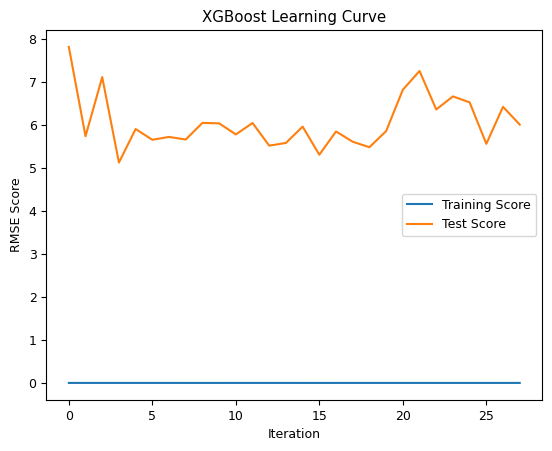

In [26]:
# XGBoost
plot_learning_curve(t2_train_scores_xg_rmse, t2_results_xg, 'XGBoost Learning Curve')

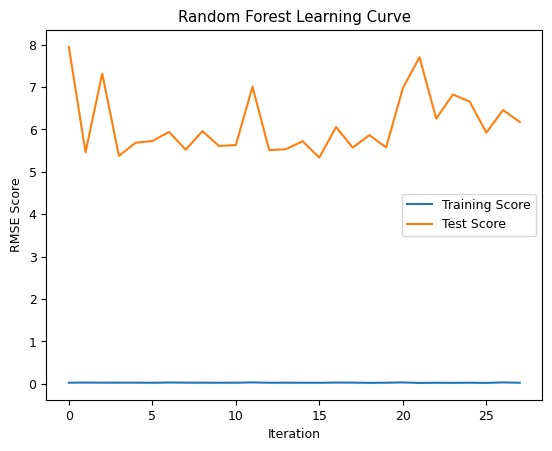

In [27]:
# Random Forest
plot_learning_curve(t2_train_scores_rf_rmse, t2_results_rf, 'Random Forest Learning Curve')

In [28]:
# CatBoost
plot_learning_curve(t2_train_scores_cb, t2_results_cb, 'CatBoost Learning Curve')

NameError: name 't2_train_scores_cb' is not defined

In [ ]:
# LightGBM
plot_learning_curve(t2_train_scores_lg, t2_results_lg, 'LightGBM Learning Curve')

In [29]:
from sklearn.model_selection import learning_curve
X=  np.array(feature_train)
y = np.array(hba1c_train)
def draw_learning_curves(modname, X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title(modname + ": Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [30]:
draw_learning_curves("XGB Regression", X,y, rf, 500)

KeyboardInterrupt: 

> Evaluation of __Test 2__

GB with reduced features 

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.5873720035945718
MSE       =  0.3464953483035035
ME        =  -0.03859375204358769
MAD       =  0.4549386262893675
RMSE      =  0.5886385548904383
R2 score  =  0.5744993921495756
Pearson R and p-value:  PearsonRResult(statistic=0.7639407029597914, pvalue=2.240297251258289e-06)
##################################################################################



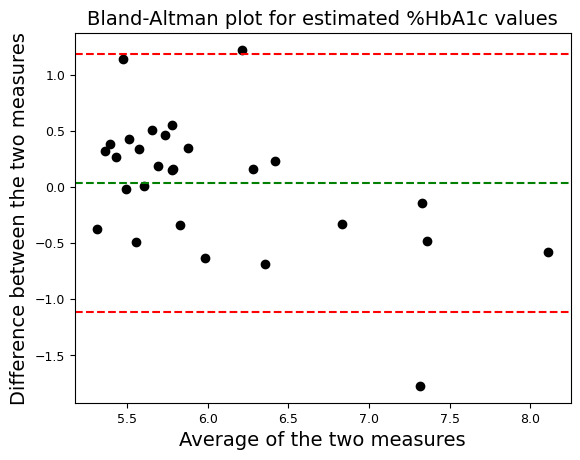

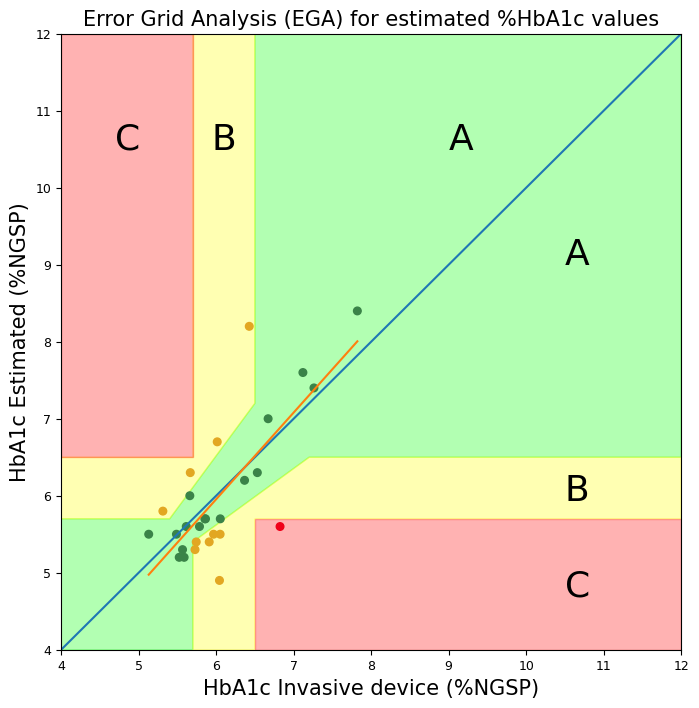

In [31]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t2_results_xg,
    exactValue     = t2_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.6161258929630564
MSE       =  0.38992630435152115
ME        =  -0.10156371582409511
MAD       =  0.4562597921996076
RMSE      =  0.6244407933115206
R2 score  =  0.5211656366217248
Pearson R and p-value:  PearsonRResult(statistic=0.7327357329509555, pvalue=9.258630292982257e-06)
##################################################################################



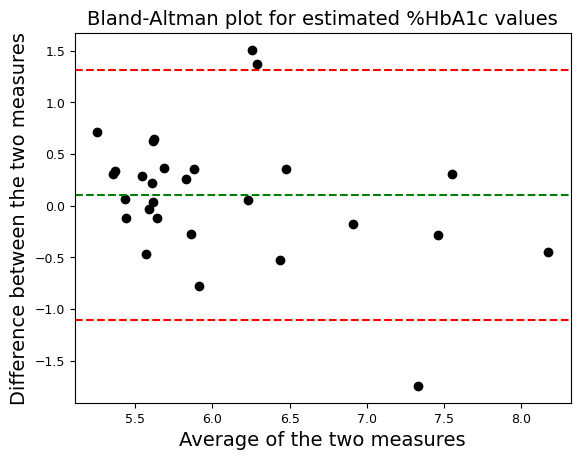

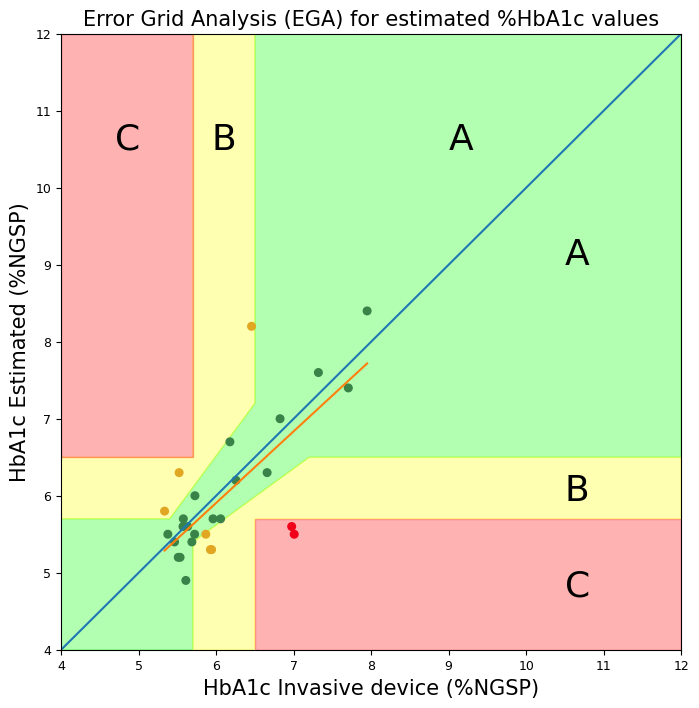

In [32]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t2_results_rf,
    exactValue     = t2_e_results_rf
)

############ HbA1c Evaluation Metrics of Cat Boost Regression ############
Diff STD  =  0.5937712479685727
MSE       =  0.35257419019727776
ME        =  0.0031456768940130797
MAD       =  0.4773345027057841
RMSE      =  0.5937795804819139
R2 score  =  0.5670344985124987
Pearson R and p-value:  PearsonRResult(statistic=0.7628822798693259, pvalue=2.358905143834016e-06)
##################################################################################



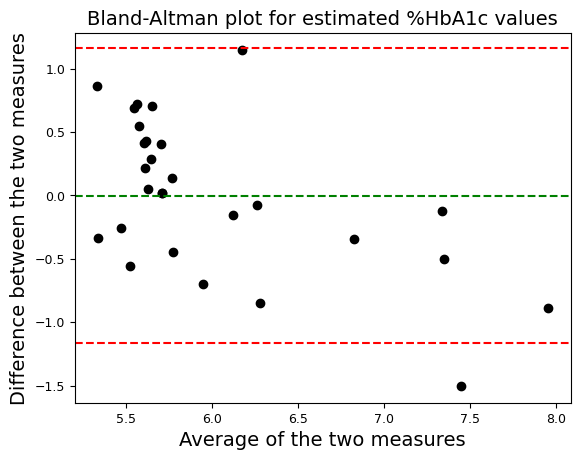

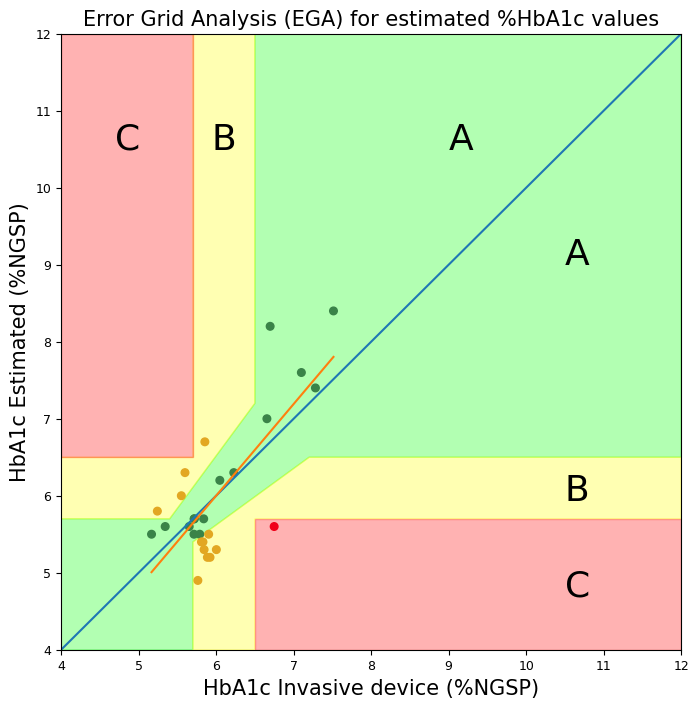

In [33]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t2_results_cb,

    
    exactValue     = t2_e_results_cb
)

############ HbA1c Evaluation Metrics of Light GBM Regression ############
Diff STD  =  0.7186006369625884
MSE       =  0.5241932630618542
ME        =  -0.08835376403309973
MAD       =  0.5180389086215148
RMSE      =  0.7240119219058856
R2 score  =  0.3562841372734784
Pearson R and p-value:  PearsonRResult(statistic=0.6203581650071051, pvalue=0.00042884796264825955)
##################################################################################



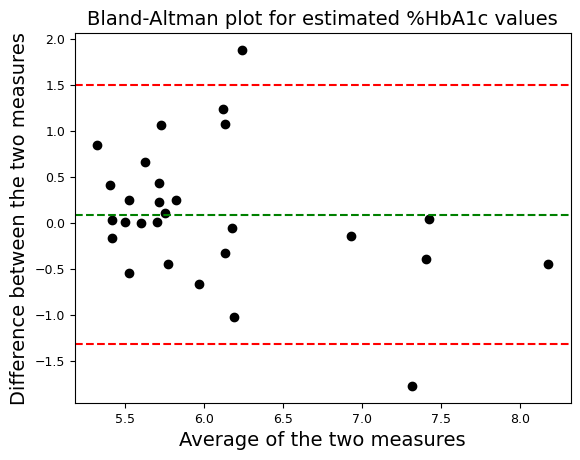

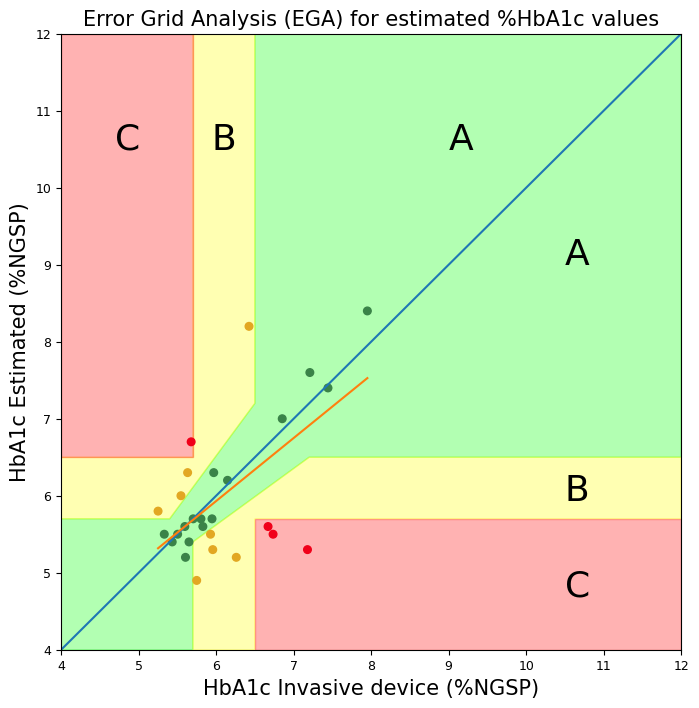

In [34]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t2_results_lg,
    exactValue     = t2_e_results_lg
)

In [ ]:
df=pd.DataFrame(train_array)
df

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
b=cb.feature_importances_
b

In [ ]:
features_frame = [ 'ZCR_green', 'ACR_green','SAD_green', 'KTE Variance_green', 'ZCR_blue','Auto_correlation_blue', 'Sum of Absolute Difference_blue', 'KTE Variance_blue','SpO2', 'BMI']

In [ ]:
feature_importance = np.array(b)
feature_names = np.array(features_frame)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('LightGBM for GB' + ' ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
import pandas as pd

G with reduced features and bmi, spo2

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t2_results_xg,
    exactValue     = t2_e_results_xg
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t2_results_rf,
    exactValue     = t2_e_results_rf
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t2_results_cb,
    exactValue     = t2_e_results_cb
)

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t2_results_lg,
    exactValue     = t2_e_results_lg
)

In [ ]:
ltb.plot_importance(booster= lg)
plt.show()

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
b=lg.feature_importances_
b

In [ ]:
features_frame = features_frame =['ZCR_green','Auto_correlation_green', 'Sum of Absolute Difference_green', 'KTE Variance_green', 'SpO2', 'BMI']

In [ ]:
feature_importance = np.array(b)
feature_names = np.array(features_frame)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('LightGBM for green only' + ' ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt